# Paleomagntism of the Teel Formation

## Teel Volcanics Data Analysis

What follows is an analysis of the Ordovician-Silurian Teel Formation. Most samples are basalts of Hirnantian age, taken from flows to the east of Khukh Davaa in 2014.

### Import Modules

In [1]:
import sys
import pandas as pd
sys.path.insert(0, '/Users/taylorkilian/PmagPy')
import pmag, pmagplotlib, ipmag
import pickle
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
from mpl_toolkits.basemap import Basemap
%matplotlib inline

### Sampling localities

Table of site locality coordeinates in WGS84. Exact stratigraphic positions are shown in main text; order of stratigraphic position is given in "stat_pos" column of table.

In [12]:
teel_2015_site_locs = pd.read_csv('/Users/taylorkilian/2015_Teel_Basalts/Data/Teel_data_compiled/er_sites.txt',sep='\t',header=1)
teel_strat_index = pd.read_csv('./Code/Tables/site_ids.csv',header=0,index_col=0)
teel_2015_site_locs.insert(5,'strat_pos',list(teel_strat_index['strat_pos']))
teel_2015_site_locs.to_csv('./Code/notebook_output/Teel_site_latlong')
teel_2015_site_locs

,er_citation_names,er_location_name,er_site_name,site_lat,site_lon,strat_pos
0,This study,unknown,Z30,47.10038,95.37550,4
1,This study,unknown,Z31,47.10049,95.37604,5
2,This study,unknown,Z32,47.10094,95.37684,6
3,This study,unknown,Z33,47.10107,95.37705,7
4,This study,unknown,Z34,47.10111,95.37712,8
5,This study,unknown,Z35,47.10069,95.37747,9
6,This study,unknown,Z36,47.10221,95.37959,11
7,This study,unknown,Z37,47.10211,95.37971,12
8,This study,unknown,Z38,47.09855,95.38445,13
9,This study,unknown,Z39,47.09860,95.38467,14


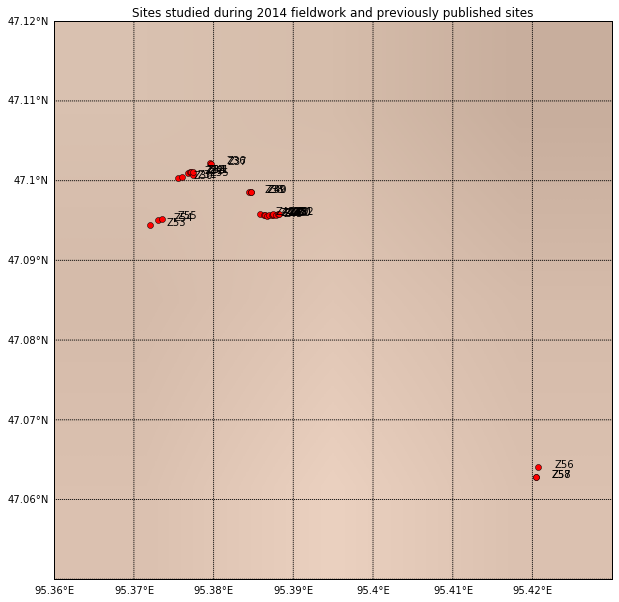

In [16]:
fig = plt.figure(figsize=(10,10))
m = Basemap(projection='cyl',llcrnrlat=47.05,urcrnrlat=47.12,llcrnrlon=95.36,
            urcrnrlon=95.43,resolution='h',area_thresh = 0.1)
m.shadedrelief()
m.drawrivers(color='#99ffff')
parallels = np.arange(45,48,0.01)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
meridians = np.arange(95,96,0.01)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
plt.title('Sites studied during 2014 fieldwork and previously published sites')

s_long=[]
s_lat=[]
for n in range(0,len(teel_2015_site_locs)):
    s_long.append(teel_2015_site_locs['site_lon'][n])          
    s_lat.append(teel_2015_site_locs['site_lat'][n])
x,y = m(s_long,s_lat)
m.plot(x, y, 'ro', markersize=6)

labels = teel_2015_site_locs['er_site_name']    
labels
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt+0.002, ypt, label)
plt.savefig('./Code/notebook_output/site_map.pdf')
plt.show()

The paleomagnetic data from these sites may need to be tilt-corrected (given the age of magnetization) according to nearby measurements of bedding. The bedding measurements used for tilt-corrections are shown below.

In [18]:
teel_site_bedding = pd.read_csv('./Code/Tables/site_tilt_corrections.txt',sep='\t',header=0,index_col=0)
teel_site_bedding.to_csv('./Code/notebook_output/teel_site_bedding')
teel_site_bedding

,sample_bed_dip,sample_bed_dip_direction
er_site_name,,
Z30,58,88
Z31,58,88
Z32,55,84
Z33,55,84
Z34,55,84
Z35,55,84
Z36,47,89
Z37,47,89
Z38,46,87


The bedding measurements for flows Z56, Z57, and Z58 was measured from small lenses of sedimentary rocks between flows (or from flow banding????). We average these measurements by taking a fisher mean of the poles derived from the bedding plane measurements.

In [19]:
#Bedding measurments for Z56, Z57, Z58 
bedding_poles_all = []
bedding_poles_edit = []
bedding_poles_edit.append([359,90-26])
bedding_poles_edit.append([54-90+360,90-23])
bedding_poles_edit.append([80-90+360,90-24])
bedding_poles_all.append([124-90,90-23])
bedding_poles_all.append([122-90,90-24])
bedding_poles_all.append([101-90,90-24])
bedding_poles_all.append([113-90,90-34])
bedding_poles_all.append([121-90,90-27])
bedding_poles_all.append([122-90,90-26])
bedding_poles_all.append([103-90,90-27])
bedding_poles_all.append(bedding_poles_edit)

In [20]:
pmag.fisher_mean(bedding_poles_edit)

{'alpha95': 11.477330440177056,
 'csd': 7.5069268730952095,
 'dec': 345.07072586523549,
 'inc': 66.37591972421707,
 'k': 116.42484465586055,
 'n': 3,
 'r': 2.9828215360225578}

In [21]:
pmag.fisher_mean(bedding_poles_all)

{'alpha95': 180.0,
 'csd': 75.717272007537375,
 'dec': 44.552429367843892,
 'inc': 50.036988188443182,
 'k': 1.1444059858078446,
 'n': 8,
 'r': 1.8832895958171265}

For the first three measurements there is an average bedding with an So of 75/24, or DD-D of 165-24. For all of the measurements there is an average bedding with an So of 104/24, or DD-D of 194-24.

We belief the first three bedding measurements are the most representative for the outcrop panel and are applied to the table above.

### Principal-component analysis of data

Below we import paleomangetic results that were analyzed using demag_gui.py from the PmagPy python package. These are the vector component fits to all Teel sample data, including components from all temperature ranges.

In [25]:
#Import data analyzed in pmag_gui.py
Teel_data_raw = pd.read_csv('./Data/Teel_data_compiled/pmag_specimens.txt',sep='\t',header=1)

We will go through each site, Z30 through Z58, and calculate site mean directions from vector fits of demagnetization data, including fits from all temperture ranges. Components have been classified according to their relative temperature ranges. 'LOW' components are typically below 200ºC, 'MAG' refers to a temperature range within the unblocking range of magnetite (up to 580ºC), 'HEM' refers to vector components fit to data points in the unblocking range of hematite (up to 680ºC), and 'MID' refers to components with temperature ranges between 'LOW' and 'MAG'.

#### Z30

Site Z30 was sampled in a rhyolite at the base of the Teel Formation stratigraphic section.

In [26]:
Z30_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z30']
Z30_geo = Z30_all[Z30_all['specimen_tilt_correction'] == 0]
Z30_tc = Z30_all[Z30_all['specimen_tilt_correction'] == 100]
Z30_tc.reset_index(inplace=True)
Z30_geo.reset_index(inplace=True)
Z30_l_geo = Z30_geo[Z30_geo['specimen_comp_name'] == 'LOW']
Z30_l_tc = Z30_tc[Z30_tc['specimen_comp_name'] == 'LOW']
Z30_ma_geo = Z30_geo[Z30_geo['specimen_comp_name'] == 'MAG']
Z30_h_geo = Z30_geo[Z30_geo['specimen_comp_name'] == 'HEM']
Z30_ma_tc = Z30_tc[Z30_tc['specimen_comp_name'] == 'MAG']
Z30_h_tc = Z30_tc[Z30_tc['specimen_comp_name'] == 'HEM']

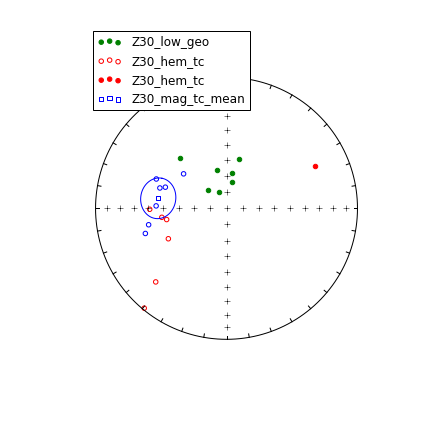

In [27]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[]
dec_l,inc_l = list(Z30_l_geo['specimen_dec'].values),list(Z30_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z30_l_tc['specimen_dec'].values),list(Z30_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z30_ma_tc['specimen_dec'].values),list(Z30_ma_tc['specimen_inc'].values)
dec_h,inc_h = list(Z30_h_tc['specimen_dec'].values),list(Z30_h_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z30_ma_geo['specimen_dec'].values),list(Z30_ma_geo['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z30_h_geo['specimen_dec'].values),list(Z30_h_geo['specimen_inc'].values)
Z30_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z30_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z30_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z30_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z30_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z30_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z30_low_tc_mean=pmag.fisher_mean(Z30_low_tc_dir) # calc means
Z30_mag_tc_mean=pmag.fisher_mean(Z30_mag_tc_dir)
Z30_hem_tc_mean=pmag.fisher_mean(Z30_hem_tc_dir)
Z30_low_geo_mean=pmag.fisher_mean(Z30_low_geo_dir) # calc means
Z30_mag_geo_mean=pmag.fisher_mean(Z30_mag_geo_dir)
Z30_hem_geo_mean=pmag.fisher_mean(Z30_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z30_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z30_hem_tc')
ipmag.plot_di_mean(Z30_mag_tc_mean['dec'],Z30_mag_tc_mean['inc'],
                  Z30_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z30_mag_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z31

Only magnetite and low temperature, LOW (less than 200ºC), components for Z31.

In [29]:
Z31_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z31']
Z31_geo = Z31_all[Z31_all['specimen_tilt_correction'] == 0]
Z31_tc = Z31_all[Z31_all['specimen_tilt_correction'] == 100]
Z31_tc.reset_index(inplace=True)
Z31_geo.reset_index(inplace=True)
Z31_l_geo = Z31_geo[Z31_geo['specimen_comp_name'] == 'LOW']
Z31_l_tc = Z31_tc[Z31_tc['specimen_comp_name'] == 'LOW']
Z31_ma_tc = Z31_tc[Z31_tc['specimen_comp_name'] == 'MAG']
Z31_ma_geo = Z31_geo[Z31_geo['specimen_comp_name'] == 'MAG']

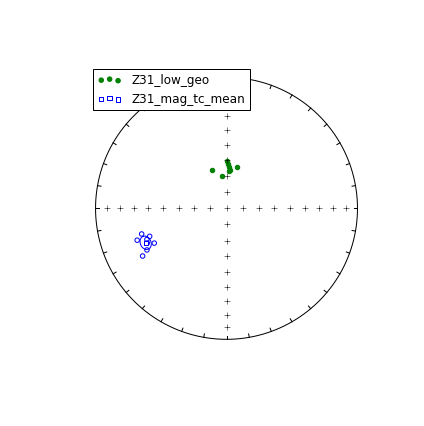

In [30]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma = [],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo = [],[],[],[]
dec_l,inc_l = list(Z31_l_geo['specimen_dec'].values),list(Z31_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z31_l_tc['specimen_dec'].values),list(Z31_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z31_ma_tc['specimen_dec'].values),list(Z31_ma_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z31_ma_geo['specimen_dec'].values),list(Z31_ma_geo['specimen_inc'].values)
Z31_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z31_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc) # make unit vectors for pmag.fisher_mean()
Z31_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z31_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z31_low_tc_mean=pmag.fisher_mean(Z31_low_tc_dir) # calc means
Z31_mag_tc_mean=pmag.fisher_mean(Z31_mag_tc_dir)
Z31_low_geo_mean=pmag.fisher_mean(Z31_low_geo_dir) 
Z31_mag_geo_mean=pmag.fisher_mean(Z31_mag_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z31_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di_mean(Z31_mag_tc_mean['dec'],Z31_mag_tc_mean['inc'],
                  Z31_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z31_mag_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z32

Only magnetite and low temperature, LOW (less than 200ºC), components for Z32.

In [32]:
Z32_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z32']
Z32_geo = Z32_all[Z32_all['specimen_tilt_correction'] == 0]
Z32_tc = Z32_all[Z32_all['specimen_tilt_correction'] == 100]
Z32_tc.reset_index(inplace=True)
Z32_geo.reset_index(inplace=True)
Z32_l_geo = Z32_geo[Z32_geo['specimen_comp_name'] == 'LOW']
Z32_l_tc = Z32_tc[Z32_tc['specimen_comp_name'] == 'LOW']
Z32_ma_tc = Z32_tc[Z32_tc['specimen_comp_name'] == 'MAG']
Z32_ma_geo = Z32_geo[Z32_geo['specimen_comp_name'] == 'MAG']

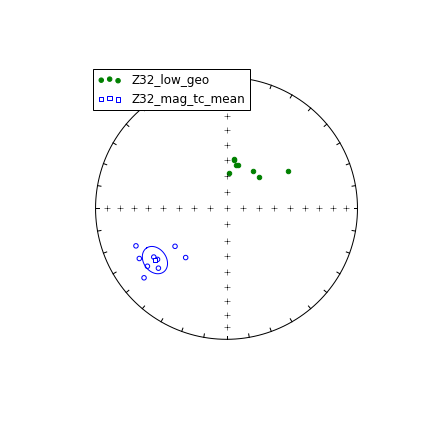

In [33]:
Z32_l_tc_edit,Z32_l_geo_edit = [],[]
Z32_l_tc_edit = Z32_l_tc
Z32_l_tc_edit = Z32_l_tc_edit[Z32_l_tc_edit['er_sample_name'] != 'Z32.3'] 
Z32_l_geo_edit = Z32_l_geo
Z32_l_geo_edit = Z32_l_geo_edit[Z32_l_geo_edit['er_sample_name'] != 'Z32.3'] 
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma = [],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo = [],[],[],[]
dec_l,inc_l = list(Z32_l_geo_edit['specimen_dec'].values),list(Z32_l_geo_edit['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z32_l_tc_edit['specimen_dec'].values),list(Z32_l_tc_edit['specimen_inc'].values)
dec_ma,inc_ma = list(Z32_ma_tc['specimen_dec'].values),list(Z32_ma_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z32_ma_geo['specimen_dec'].values),list(Z32_ma_geo['specimen_inc'].values)
Z32_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z32_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc) # make unit vectors for pmag.fisher_mean()
Z32_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z32_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z32_low_tc_mean=pmag.fisher_mean(Z32_low_geo_dir) # calc means
Z32_mag_tc_mean=pmag.fisher_mean(Z32_mag_tc_dir)
Z32_low_geo_mean=pmag.fisher_mean(Z32_low_geo_dir) 
Z32_mag_geo_mean=pmag.fisher_mean(Z32_mag_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z32_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di_mean(Z32_mag_tc_mean['dec'],Z32_mag_tc_mean['inc'],
                  Z32_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z32_mag_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z33

Only magnetite and low temperature, LOW (less than 200ºC), components for Z33.

In [34]:
Z33_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z33']
Z33_geo = Z33_all[Z33_all['specimen_tilt_correction'] == 0]
Z33_tc = Z33_all[Z33_all['specimen_tilt_correction'] == 100]
Z33_tc.reset_index(inplace=True)
Z33_geo.reset_index(inplace=True)
Z33_l_geo = Z33_geo[Z33_geo['specimen_comp_name'] == 'LOW']
Z33_l_tc = Z33_tc[Z33_tc['specimen_comp_name'] == 'LOW']
Z33_ma_tc = Z33_tc[Z33_tc['specimen_comp_name'] == 'MAG']
Z33_ma_geo = Z33_geo[Z33_geo['specimen_comp_name'] == 'MAG']

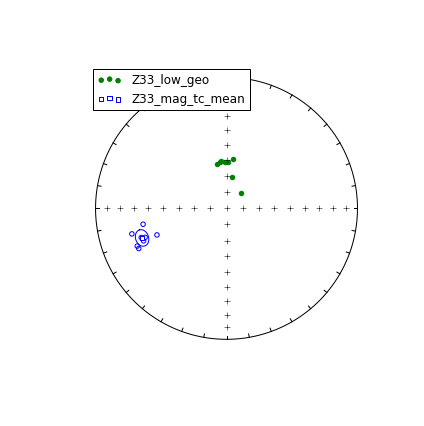

In [35]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma = [],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo = [],[],[],[]
dec_l,inc_l = list(Z33_l_geo['specimen_dec'].values),list(Z33_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z33_l_tc['specimen_dec'].values),list(Z33_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z33_ma_tc['specimen_dec'].values),list(Z33_ma_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z33_ma_geo['specimen_dec'].values),list(Z33_ma_geo['specimen_inc'].values)
Z33_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z33_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc) # make unit vectors for pmag.fisher_mean()
Z33_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z33_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z33_low_tc_mean=pmag.fisher_mean(Z33_low_tc_dir) # calc means
Z33_mag_tc_mean=pmag.fisher_mean(Z33_mag_tc_dir)
Z33_low_geo_mean=pmag.fisher_mean(Z33_low_geo_dir) 
Z33_mag_geo_mean=pmag.fisher_mean(Z33_mag_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z33_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di_mean(Z33_mag_tc_mean['dec'],Z33_mag_tc_mean['inc'],
                  Z33_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z33_mag_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z34

Only magnetite and low temperature, LOW (less than 200ºC), components for Z34.

In [36]:
Z34_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z34']
Z34_geo = Z34_all[Z34_all['specimen_tilt_correction'] == 0]
Z34_tc = Z34_all[Z34_all['specimen_tilt_correction'] == 100]
Z34_tc.reset_index(inplace=True)
Z34_geo.reset_index(inplace=True)
Z34_l_geo = Z34_geo[Z34_geo['specimen_comp_name'] == 'LOW']
Z34_l_tc = Z34_tc[Z34_tc['specimen_comp_name'] == 'LOW']
Z34_ma_tc = Z34_tc[Z34_tc['specimen_comp_name'] == 'MAG']
Z34_ma_geo = Z34_geo[Z34_geo['specimen_comp_name'] == 'MAG']

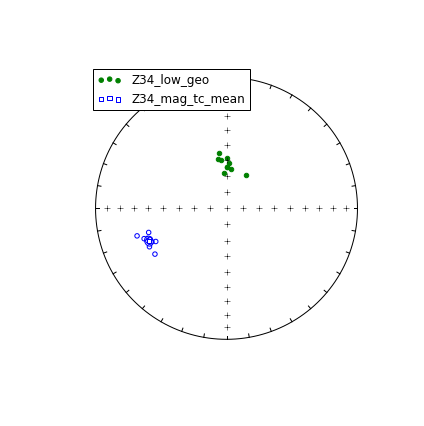

In [37]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma = [],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo = [],[],[],[]
dec_l,inc_l = list(Z34_l_geo['specimen_dec'].values),list(Z34_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z34_l_tc['specimen_dec'].values),list(Z34_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z34_ma_tc['specimen_dec'].values),list(Z34_ma_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z34_ma_geo['specimen_dec'].values),list(Z34_ma_geo['specimen_inc'].values)
Z34_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z34_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc) # make unit vectors for pmag.fisher_mean()
Z34_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z34_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z34_low_tc_mean=pmag.fisher_mean(Z34_low_tc_dir) # calc means
Z34_mag_tc_mean=pmag.fisher_mean(Z34_mag_tc_dir)
Z34_low_geo_mean=pmag.fisher_mean(Z34_low_geo_dir) 
Z34_mag_geo_mean=pmag.fisher_mean(Z34_mag_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z34_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di_mean(Z34_mag_tc_mean['dec'],Z34_mag_tc_mean['inc'],
                  Z34_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z34_mag_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z35

Hematite, magnetite, and low temperature, LOW (less than 200ºC), components were calculated for Z35.

In [38]:
Z35_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z35']
Z35_geo = Z35_all[Z35_all['specimen_tilt_correction'] == 0]
Z35_tc = Z35_all[Z35_all['specimen_tilt_correction'] == 100]
Z35_tc.reset_index(inplace=True)
Z35_geo.reset_index(inplace=True)
Z35_l_geo = Z35_geo[Z35_geo['specimen_comp_name'] == 'LOW']
Z35_l_tc = Z35_tc[Z35_tc['specimen_comp_name'] == 'LOW']
Z35_ma_geo = Z35_geo[Z35_geo['specimen_comp_name'] == 'MAG']
Z35_h_geo = Z35_geo[Z35_geo['specimen_comp_name'] == 'HEM']
Z35_ma_tc = Z35_tc[Z35_tc['specimen_comp_name'] == 'MAG']
Z35_h_tc = Z35_tc[Z35_tc['specimen_comp_name'] == 'HEM']

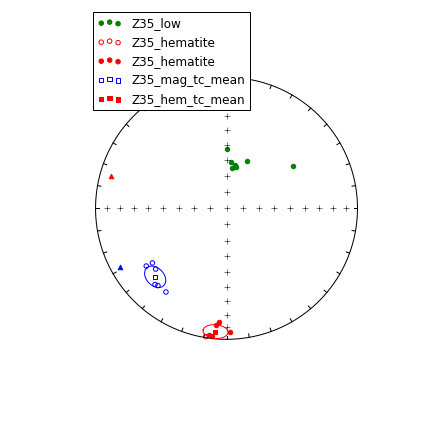

In [39]:
#Below are samples components that were dropped because they were clear outliers
#...irregular demagnetization behavior from sample Z35.3 - dropped from mean calc
Z35_h_tc_edit,Z35_ma_tc_edit,Z35_h_geo_edit,Z35_ma_geo_edit = [],[],[],[]
Z35_h_tc_edit = Z35_h_tc
Z35_h_tc_edit = Z35_h_tc_edit[Z35_h_tc_edit['er_sample_name'] != 'Z35.3'] 
Z35_ma_tc_edit = Z35_ma_tc
Z35_ma_tc_edit = Z35_ma_tc_edit[Z35_ma_tc_edit['er_sample_name'] != 'Z35.3']
Z35_h_geo_edit = Z35_h_geo
Z35_h_geo_edit = Z35_h_geo_edit[Z35_h_geo_edit['er_sample_name'] != 'Z35.3'] 
Z35_ma_geo_edit = Z35_ma_geo
Z35_ma_geo_edit = Z35_ma_geo_edit[Z35_ma_geo_edit['er_sample_name'] != 'Z35.3']
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[]
dec_l,inc_l = list(Z35_l_geo['specimen_dec'].values),list(Z35_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z35_l_tc['specimen_dec'].values),list(Z35_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z35_ma_tc_edit['specimen_dec'].values),list(Z35_ma_tc_edit['specimen_inc'].values)
dec_h,inc_h = list(Z35_h_tc_edit['specimen_dec'].values),list(Z35_h_tc_edit['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z35_ma_geo_edit['specimen_dec'].values),list(Z35_ma_geo_edit['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z35_h_geo_edit['specimen_dec'].values),list(Z35_h_geo_edit['specimen_inc'].values)
Z35_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z35_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z35_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z35_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z35_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z35_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z35_low_tc_mean=pmag.fisher_mean(Z35_low_tc_dir) # calc means
Z35_mag_tc_mean=pmag.fisher_mean(Z35_mag_tc_dir)
Z35_hem_tc_mean=pmag.fisher_mean(Z35_hem_tc_dir)
Z35_low_geo_mean=pmag.fisher_mean(Z35_low_geo_dir) # calc means
Z35_mag_geo_mean=pmag.fisher_mean(Z35_mag_geo_dir)
Z35_hem_geo_mean=pmag.fisher_mean(Z35_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z35_low')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di(Z35_ma_tc[Z35_ma_tc['er_sample_name']=='Z35.3']['specimen_dec'].values,
              Z35_ma_tc[Z35_ma_tc['er_sample_name']=='Z35.3']['specimen_inc'].values,color='b',marker='^')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z35_hematite')
ipmag.plot_di(Z35_h_tc[Z35_h_tc['er_sample_name']=='Z35.3']['specimen_dec'].values,
              Z35_h_tc[Z35_h_tc['er_sample_name']=='Z35.3']['specimen_inc'].values,color='r',marker='^')
ipmag.plot_di_mean(Z35_mag_tc_mean['dec'],Z35_mag_tc_mean['inc'],
                  Z35_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z35_mag_tc_mean')
ipmag.plot_di_mean(Z35_hem_tc_mean['dec'],Z35_hem_tc_mean['inc'],
                  Z35_hem_tc_mean["alpha95"],color='r',marker='s',
                  label='Z35_hem_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

Data points shown with triangles were vectors from sample Z35.3 that were dropped from the mean calculation.

#### Z36

Only magnetite and low temperature, LOW (less than 200ºC), components were calculated for Z36.

In [40]:
Z36_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z36']
Z36_geo = Z36_all[Z36_all['specimen_tilt_correction'] == 0]
Z36_tc = Z36_all[Z36_all['specimen_tilt_correction'] == 100]
Z36_tc.reset_index(inplace=True)
Z36_geo.reset_index(inplace=True)
Z36_l_geo = Z36_geo[Z36_geo['specimen_comp_name'] == 'LOW']
Z36_l_tc = Z36_tc[Z36_tc['specimen_comp_name'] == 'LOW']
Z36_ma_tc = Z36_tc[Z36_tc['specimen_comp_name'] == 'MAG']
Z36_ma_geo = Z36_geo[Z36_geo['specimen_comp_name'] == 'MAG']

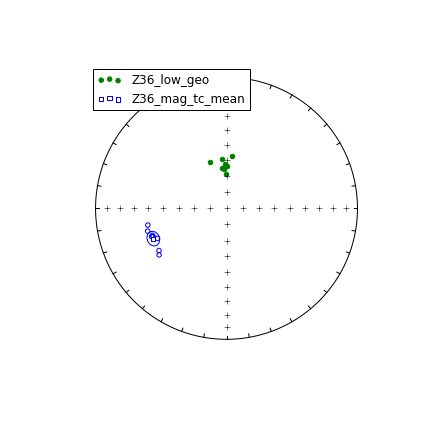

In [41]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma = [],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo = [],[],[],[]
dec_l,inc_l = list(Z36_l_geo['specimen_dec'].values),list(Z36_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z36_l_tc['specimen_dec'].values),list(Z36_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z36_ma_tc['specimen_dec'].values),list(Z36_ma_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z36_ma_geo['specimen_dec'].values),list(Z36_ma_geo['specimen_inc'].values)
Z36_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z36_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc) # make unit vectors for pmag.fisher_mean()
Z36_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z36_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z36_low_tc_mean=pmag.fisher_mean(Z36_low_tc_dir) # calc means
Z36_mag_tc_mean=pmag.fisher_mean(Z36_mag_tc_dir)
Z36_low_geo_mean=pmag.fisher_mean(Z36_low_geo_dir) 
Z36_mag_geo_mean=pmag.fisher_mean(Z36_mag_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z36_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di_mean(Z36_mag_tc_mean['dec'],Z36_mag_tc_mean['inc'],
                  Z36_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z36_mag_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

Magnetite and low temperature, LOW (less than 200ºC), components were calculated for Z37.

In [42]:
Z37_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z37']
Z37_geo = Z37_all[Z37_all['specimen_tilt_correction'] == 0]
Z37_tc = Z37_all[Z37_all['specimen_tilt_correction'] == 100]
Z37_tc.reset_index(inplace=True)
Z37_geo.reset_index(inplace=True)
Z37_l_geo = Z37_geo[Z37_geo['specimen_comp_name'] == 'LOW']
Z37_l_tc = Z37_tc[Z37_tc['specimen_comp_name'] == 'LOW']
Z37_ma_tc = Z37_tc[Z37_tc['specimen_comp_name'] == 'MAG']
Z37_ma_geo = Z37_geo[Z37_geo['specimen_comp_name'] == 'MAG']

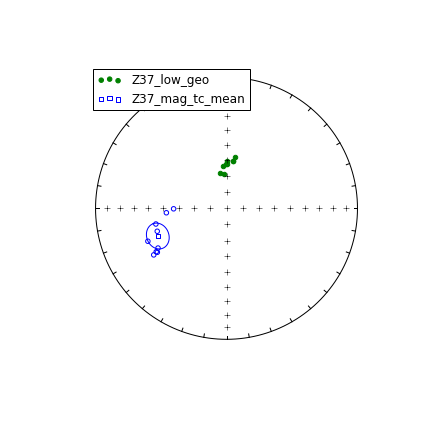

In [43]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma = [],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo = [],[],[],[]
dec_l,inc_l = list(Z37_l_geo['specimen_dec'].values),list(Z37_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z37_l_tc['specimen_dec'].values),list(Z37_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z37_ma_tc['specimen_dec'].values),list(Z37_ma_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z37_ma_geo['specimen_dec'].values),list(Z37_ma_geo['specimen_inc'].values)
Z37_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z37_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc) # make unit vectors for pmag.fisher_mean()
Z37_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z37_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z37_low_tc_mean=pmag.fisher_mean(Z37_low_tc_dir) # calc means
Z37_mag_tc_mean=pmag.fisher_mean(Z37_mag_tc_dir)
Z37_low_geo_mean=pmag.fisher_mean(Z37_low_geo_dir) 
Z37_mag_geo_mean=pmag.fisher_mean(Z37_mag_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z37_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di_mean(Z37_mag_tc_mean['dec'],Z37_mag_tc_mean['inc'],
                  Z37_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z37_mag_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z38

Hematite, magnetite, and low temperature, LOW (less than 200ºC), components were calculated for Z38.

In [44]:
Z38_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z38']
Z38_geo = Z38_all[Z38_all['specimen_tilt_correction'] == 0]
Z38_tc = Z38_all[Z38_all['specimen_tilt_correction'] == 100]
Z38_tc.reset_index(inplace=True)
Z38_geo.reset_index(inplace=True)
Z38_l_geo = Z38_geo[Z38_geo['specimen_comp_name'] == 'LOW']
Z38_l_tc = Z38_tc[Z38_tc['specimen_comp_name'] == 'LOW']
Z38_ma_geo = Z38_geo[Z38_geo['specimen_comp_name'] == 'MAG']
Z38_h_geo = Z38_geo[Z38_geo['specimen_comp_name'] == 'HEM']
Z38_ma_tc = Z38_tc[Z38_tc['specimen_comp_name'] == 'MAG']
Z38_h_tc = Z38_tc[Z38_tc['specimen_comp_name'] == 'HEM']

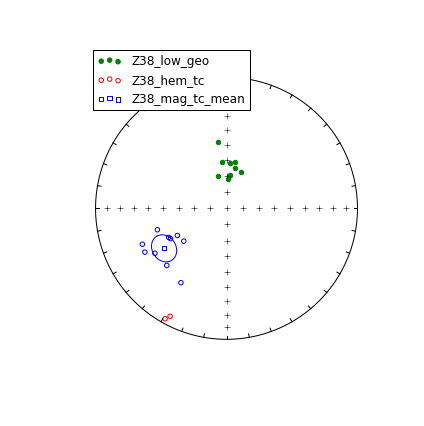

In [45]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[]
dec_l,inc_l = list(Z38_l_geo['specimen_dec'].values),list(Z38_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z38_l_tc['specimen_dec'].values),list(Z38_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z38_ma_tc['specimen_dec'].values),list(Z38_ma_tc['specimen_inc'].values)
dec_h,inc_h = list(Z38_h_tc['specimen_dec'].values),list(Z38_h_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z38_ma_geo['specimen_dec'].values),list(Z38_ma_geo['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z38_h_geo['specimen_dec'].values),list(Z38_h_geo['specimen_inc'].values)
Z38_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z38_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z38_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z38_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z38_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z38_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z38_low_tc_mean=pmag.fisher_mean(Z38_low_tc_dir) # calc means
Z38_mag_tc_mean=pmag.fisher_mean(Z38_mag_tc_dir)
Z38_hem_tc_mean=pmag.fisher_mean(Z38_hem_tc_dir)
Z38_low_geo_mean=pmag.fisher_mean(Z38_low_geo_dir) # calc means
Z38_mag_geo_mean=pmag.fisher_mean(Z38_mag_geo_dir)
Z38_hem_geo_mean=pmag.fisher_mean(Z38_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z38_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z38_hem_tc')
ipmag.plot_di_mean(Z38_mag_tc_mean['dec'],Z38_mag_tc_mean['inc'],
                  Z38_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z38_mag_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

Only two samples yielded hematite components, therefore no mean was calculated for the hematite component.

#### Z39

Hematite, magnetite, and low temperature, LOW (less than 200ºC), components were calculated for Z39.

In [46]:
Z39_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z39']
Z39_geo = Z39_all[Z39_all['specimen_tilt_correction'] == 0]
Z39_tc = Z39_all[Z39_all['specimen_tilt_correction'] == 100]
Z39_tc.reset_index(inplace=True)
Z39_geo.reset_index(inplace=True)
Z39_l_geo = Z39_geo[Z39_geo['specimen_comp_name'] == 'LOW']
Z39_l_tc = Z39_tc[Z39_tc['specimen_comp_name'] == 'LOW']
Z39_ma_geo = Z39_geo[Z39_geo['specimen_comp_name'] == 'MAG']
Z39_h_geo = Z39_geo[Z39_geo['specimen_comp_name'] == 'HEM']
Z39_ma_tc = Z39_tc[Z39_tc['specimen_comp_name'] == 'MAG']
Z39_h_tc = Z39_tc[Z39_tc['specimen_comp_name'] == 'HEM']

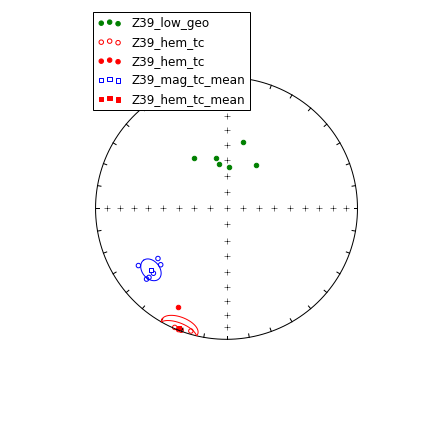

In [47]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[]
dec_l,inc_l = list(Z39_l_geo['specimen_dec'].values),list(Z39_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z39_l_tc['specimen_dec'].values),list(Z39_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z39_ma_tc['specimen_dec'].values),list(Z39_ma_tc['specimen_inc'].values)
dec_h,inc_h = list(Z39_h_tc['specimen_dec'].values),list(Z39_h_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z39_ma_geo['specimen_dec'].values),list(Z39_ma_geo['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z39_h_geo['specimen_dec'].values),list(Z39_h_geo['specimen_inc'].values)
Z39_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z39_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z39_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z39_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z39_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z39_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z39_low_tc_mean=pmag.fisher_mean(Z39_low_tc_dir) # calc means
Z39_mag_tc_mean=pmag.fisher_mean(Z39_mag_tc_dir)
Z39_hem_tc_mean=pmag.fisher_mean(Z39_hem_tc_dir)
Z39_low_geo_mean=pmag.fisher_mean(Z39_low_geo_dir) # calc means
Z39_mag_geo_mean=pmag.fisher_mean(Z39_mag_geo_dir)
Z39_hem_geo_mean=pmag.fisher_mean(Z39_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z39_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z39_hem_tc')
ipmag.plot_di_mean(Z39_mag_tc_mean['dec'],Z39_mag_tc_mean['inc'],
                  Z39_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z39_mag_tc_mean')
ipmag.plot_di_mean(Z39_hem_tc_mean['dec'],Z39_hem_tc_mean['inc'],
                  Z39_hem_tc_mean["alpha95"],color='r',marker='s',
                  label='Z39_hem_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z40

Hematite, magnetite, and low temperature, LOW (less than 200ºC), components were calculated for Z40.

In [48]:
Z40_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z40']
Z40_geo = Z40_all[Z40_all['specimen_tilt_correction'] == 0]
Z40_tc = Z40_all[Z40_all['specimen_tilt_correction'] == 100]
Z40_tc.reset_index(inplace=True)
Z40_geo.reset_index(inplace=True)
Z40_l_geo = Z40_geo[Z40_geo['specimen_comp_name'] == 'LOW']
Z40_l_tc = Z40_tc[Z40_tc['specimen_comp_name'] == 'LOW']
Z40_ma_geo = Z40_geo[Z40_geo['specimen_comp_name'] == 'MAG']
Z40_h_geo = Z40_geo[Z40_geo['specimen_comp_name'] == 'HEM']
Z40_ma_tc = Z40_tc[Z40_tc['specimen_comp_name'] == 'MAG']
Z40_h_tc = Z40_tc[Z40_tc['specimen_comp_name'] == 'HEM']

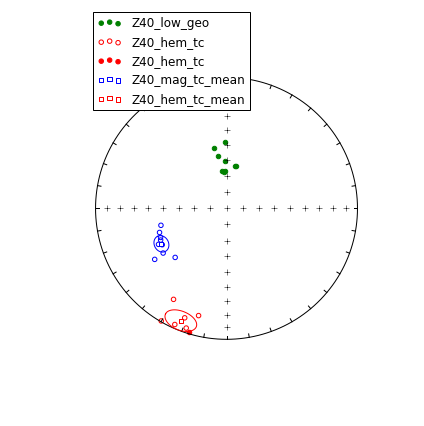

In [49]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[]
dec_l,inc_l = list(Z40_l_geo['specimen_dec'].values),list(Z40_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z40_l_tc['specimen_dec'].values),list(Z40_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z40_ma_tc['specimen_dec'].values),list(Z40_ma_tc['specimen_inc'].values)
dec_h,inc_h = list(Z40_h_tc['specimen_dec'].values),list(Z40_h_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z40_ma_geo['specimen_dec'].values),list(Z40_ma_geo['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z40_h_geo['specimen_dec'].values),list(Z40_h_geo['specimen_inc'].values)
Z40_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z40_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z40_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z40_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z40_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z40_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z40_low_tc_mean=pmag.fisher_mean(Z40_low_tc_dir) # calc means
Z40_mag_tc_mean=pmag.fisher_mean(Z40_mag_tc_dir)
Z40_hem_tc_mean=pmag.fisher_mean(Z40_hem_tc_dir)
Z40_low_geo_mean=pmag.fisher_mean(Z40_low_geo_dir) # calc means
Z40_mag_geo_mean=pmag.fisher_mean(Z40_mag_geo_dir)
Z40_hem_geo_mean=pmag.fisher_mean(Z40_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z40_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z40_hem_tc')
ipmag.plot_di_mean(Z40_mag_tc_mean['dec'],Z40_mag_tc_mean['inc'],
                  Z40_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z40_mag_tc_mean')
ipmag.plot_di_mean(Z40_hem_tc_mean['dec'],Z40_hem_tc_mean['inc'],
                  Z40_hem_tc_mean["alpha95"],color='r',marker='s',
                  label='Z40_hem_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z41

In [50]:
Z41_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z41']
Z41_geo = Z41_all[Z41_all['specimen_tilt_correction'] == 0]
Z41_tc = Z41_all[Z41_all['specimen_tilt_correction'] == 100]
Z41_tc.reset_index(inplace=True)
Z41_geo.reset_index(inplace=True)
Z41_l_geo = Z41_geo[Z41_geo['specimen_comp_name'] == 'LOW']
Z41_l_tc = Z41_tc[Z41_tc['specimen_comp_name'] == 'LOW']
Z41_ma_geo = Z41_geo[Z41_geo['specimen_comp_name'] == 'MAG']
Z41_h_geo = Z41_geo[Z41_geo['specimen_comp_name'] == 'HEM']
Z41_ma_tc = Z41_tc[Z41_tc['specimen_comp_name'] == 'MAG']
Z41_h_tc = Z41_tc[Z41_tc['specimen_comp_name'] == 'HEM']

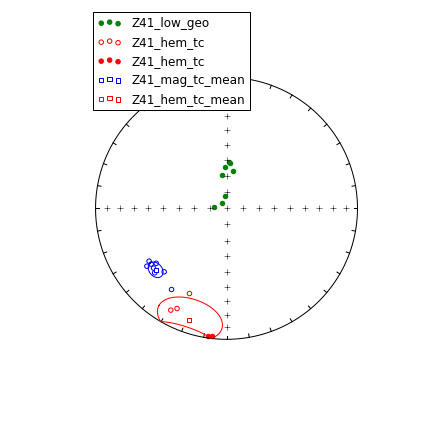

In [51]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[]
dec_l,inc_l = list(Z41_l_geo['specimen_dec'].values),list(Z41_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z41_l_tc['specimen_dec'].values),list(Z41_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z41_ma_tc['specimen_dec'].values),list(Z41_ma_tc['specimen_inc'].values)
dec_h,inc_h = list(Z41_h_tc['specimen_dec'].values),list(Z41_h_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z41_ma_geo['specimen_dec'].values),list(Z41_ma_geo['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z41_h_geo['specimen_dec'].values),list(Z41_h_geo['specimen_inc'].values)
Z41_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z41_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z41_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z41_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z41_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z41_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z41_low_tc_mean=pmag.fisher_mean(Z41_low_tc_dir) # calc means
Z41_mag_tc_mean=pmag.fisher_mean(Z41_mag_tc_dir)
Z41_hem_tc_mean=pmag.fisher_mean(Z41_hem_tc_dir)
Z41_low_geo_mean=pmag.fisher_mean(Z41_low_geo_dir) # calc means
Z41_mag_geo_mean=pmag.fisher_mean(Z41_mag_geo_dir)
Z41_hem_geo_mean=pmag.fisher_mean(Z41_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z41_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z41_hem_tc')
ipmag.plot_di_mean(Z41_mag_tc_mean['dec'],Z41_mag_tc_mean['inc'],
                  Z41_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z41_mag_tc_mean')
ipmag.plot_di_mean(Z41_hem_tc_mean['dec'],Z41_hem_tc_mean['inc'],
                  Z41_hem_tc_mean["alpha95"],color='r',marker='s',
                  label='Z41_hem_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z42

Hematite, magnetite, and low temperature, LOW (less than 200ºC), components were calculated for Z42. A middle temperature component, MID, is also calculated, which derives from demagnetization steps between LOW and magnetite.

In [52]:
Z42_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z42']
Z42_geo = Z42_all[Z42_all['specimen_tilt_correction'] == 0]
Z42_tc = Z42_all[Z42_all['specimen_tilt_correction'] == 100]
Z42_tc.reset_index(inplace=True)
Z42_geo.reset_index(inplace=True)
Z42_l_geo = Z42_geo[Z42_geo['specimen_comp_name'] == 'LOW']
Z42_l_tc = Z42_tc[Z42_tc['specimen_comp_name'] == 'LOW']
Z42_ma_geo = Z42_geo[Z42_geo['specimen_comp_name'] == 'MAG']
Z42_h_geo = Z42_geo[Z42_geo['specimen_comp_name'] == 'HEM']
Z42_ma_tc = Z42_tc[Z42_tc['specimen_comp_name'] == 'MAG']
Z42_h_tc = Z42_tc[Z42_tc['specimen_comp_name'] == 'HEM']
Z42_mi_tc = Z42_tc[Z42_tc['specimen_comp_name'] == 'MID']
Z42_mi_geo = Z42_geo[Z42_geo['specimen_comp_name'] == 'MID']

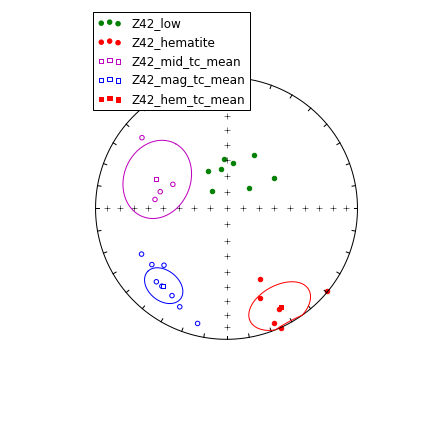

In [53]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_mi,inc_mi,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_mi_geo,inc_mi_geo,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[],[],[]
dec_l,inc_l = list(Z42_l_geo['specimen_dec'].values),list(Z42_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z42_l_tc['specimen_dec'].values),list(Z42_l_tc['specimen_inc'].values)
dec_mi,inc_mi = list(Z42_mi_tc['specimen_dec'].values),list(Z42_mi_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z42_ma_tc['specimen_dec'].values),list(Z42_ma_tc['specimen_inc'].values)
dec_h,inc_h = list(Z42_h_tc['specimen_dec'].values),list(Z42_h_tc['specimen_inc'].values)
dec_mi_geo,inc_mi_geo = list(Z42_mi_geo['specimen_dec'].values),list(Z42_mi_geo['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z42_ma_geo['specimen_dec'].values),list(Z42_ma_geo['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z42_h_geo['specimen_dec'].values),list(Z42_h_geo['specimen_inc'].values)
Z42_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z42_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z42_mid_tc_dir = ipmag.make_di_block(dec_mi,inc_mi)
Z42_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z42_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z42_mid_geo_dir = ipmag.make_di_block(dec_mi_geo,inc_mi_geo)
Z42_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z42_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z42_low_tc_mean=pmag.fisher_mean(Z42_low_tc_dir) # calc means
Z42_mid_tc_mean=pmag.fisher_mean(Z42_mid_tc_dir)
Z42_mag_tc_mean=pmag.fisher_mean(Z42_mag_tc_dir)
Z42_hem_tc_mean=pmag.fisher_mean(Z42_hem_tc_dir)
Z42_low_geo_mean=pmag.fisher_mean(Z42_low_geo_dir) # calc means
Z42_mid_geo_mean=pmag.fisher_mean(Z42_mid_geo_dir)
Z42_mag_geo_mean=pmag.fisher_mean(Z42_mag_geo_dir)
Z42_hem_geo_mean=pmag.fisher_mean(Z42_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z42_low')
ipmag.plot_di(dec_mi,inc_mi,color='m')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z42_hematite')
ipmag.plot_di_mean(Z42_mid_tc_mean['dec'],Z42_mid_tc_mean['inc'],
                  Z42_mid_tc_mean["alpha95"],color='m',marker='s',
                  label='Z42_mid_tc_mean')
ipmag.plot_di_mean(Z42_mag_tc_mean['dec'],Z42_mag_tc_mean['inc'],
                  Z42_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z42_mag_tc_mean')
ipmag.plot_di_mean(Z42_hem_tc_mean['dec'],Z42_hem_tc_mean['inc'],
                  Z42_hem_tc_mean["alpha95"],color='r',marker='s',
                  label='Z42_hem_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z43

Hematite, magnetite, and low temperature, LOW (less than 200ºC), components were calculated for Z43. A middle temperature component, MID, is also calculated, which derives from demagnetization steps between LOW and magnetite.

In [54]:
Z43_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z43']
Z43_geo = Z43_all[Z43_all['specimen_tilt_correction'] == 0]
Z43_tc = Z43_all[Z43_all['specimen_tilt_correction'] == 100]
Z43_tc.reset_index(inplace=True)
Z43_geo.reset_index(inplace=True)
Z43_l_geo = Z43_geo[Z43_geo['specimen_comp_name'] == 'LOW']
Z43_l_tc = Z43_tc[Z43_tc['specimen_comp_name'] == 'LOW']
Z43_ma_geo = Z43_geo[Z43_geo['specimen_comp_name'] == 'MAG']
Z43_h_geo = Z43_geo[Z43_geo['specimen_comp_name'] == 'HEM']
Z43_ma_tc = Z43_tc[Z43_tc['specimen_comp_name'] == 'MAG']
Z43_h_tc = Z43_tc[Z43_tc['specimen_comp_name'] == 'HEM']
Z43_mi_tc = Z43_tc[Z43_tc['specimen_comp_name'] == 'MID']
Z43_mi_geo = Z43_geo[Z43_geo['specimen_comp_name'] == 'MID']

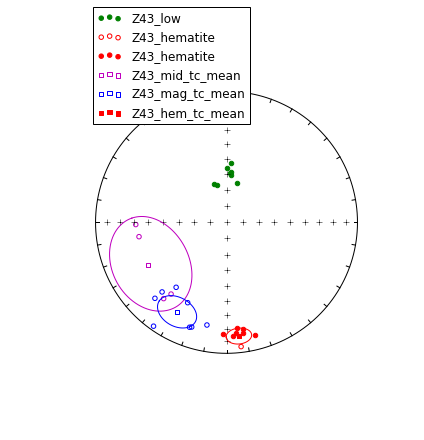

In [55]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_mi,inc_mi,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_mi_geo,inc_mi_geo,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[],[],[]
dec_l,inc_l = list(Z43_l_geo['specimen_dec'].values),list(Z43_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z43_l_tc['specimen_dec'].values),list(Z43_l_tc['specimen_inc'].values)
dec_mi,inc_mi = list(Z43_mi_tc['specimen_dec'].values),list(Z43_mi_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z43_ma_tc['specimen_dec'].values),list(Z43_ma_tc['specimen_inc'].values)
dec_h,inc_h = list(Z43_h_tc['specimen_dec'].values),list(Z43_h_tc['specimen_inc'].values)
dec_mi_geo,inc_mi_geo = list(Z43_mi_geo['specimen_dec'].values),list(Z43_mi_geo['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z43_ma_geo['specimen_dec'].values),list(Z43_ma_geo['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z43_h_geo['specimen_dec'].values),list(Z43_h_geo['specimen_inc'].values)
Z43_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z43_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z43_mid_tc_dir = ipmag.make_di_block(dec_mi,inc_mi)
Z43_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z43_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z43_mid_geo_dir = ipmag.make_di_block(dec_mi_geo,inc_mi_geo)
Z43_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z43_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z43_low_tc_mean=pmag.fisher_mean(Z43_low_tc_dir) # calc means
Z43_mid_tc_mean=pmag.fisher_mean(Z43_mid_tc_dir)
Z43_mag_tc_mean=pmag.fisher_mean(Z43_mag_tc_dir)
Z43_hem_tc_mean=pmag.fisher_mean(Z43_hem_tc_dir)
Z43_low_geo_mean=pmag.fisher_mean(Z43_low_geo_dir) # calc means
Z43_mid_geo_mean=pmag.fisher_mean(Z43_mid_geo_dir)
Z43_mag_geo_mean=pmag.fisher_mean(Z43_mag_geo_dir)
Z43_hem_geo_mean=pmag.fisher_mean(Z43_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z43_low')
ipmag.plot_di(dec_mi,inc_mi,color='m')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z43_hematite')
ipmag.plot_di_mean(Z43_mid_tc_mean['dec'],Z43_mid_tc_mean['inc'],
                  Z43_mid_tc_mean["alpha95"],color='m',marker='s',
                  label='Z43_mid_tc_mean')
ipmag.plot_di_mean(Z43_mag_tc_mean['dec'],Z43_mag_tc_mean['inc'],
                  Z43_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z43_mag_tc_mean')
ipmag.plot_di_mean(Z43_hem_tc_mean['dec'],Z43_hem_tc_mean['inc'],
                  Z43_hem_tc_mean["alpha95"],color='r',marker='s',
                  label='Z43_hem_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z44

Hematite, magnetite, and low temperature, LOW (less than 200ºC), components were calculated for Z44.

In [56]:
Z44_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z44']
Z44_geo = Z44_all[Z44_all['specimen_tilt_correction'] == 0]
Z44_tc = Z44_all[Z44_all['specimen_tilt_correction'] == 100]
Z44_tc.reset_index(inplace=True)
Z44_geo.reset_index(inplace=True)
Z44_l_geo = Z44_geo[Z44_geo['specimen_comp_name'] == 'LOW']
Z44_l_tc = Z44_tc[Z44_tc['specimen_comp_name'] == 'LOW']
Z44_ma_geo = Z44_geo[Z44_geo['specimen_comp_name'] == 'MAG']
Z44_h_geo = Z44_geo[Z44_geo['specimen_comp_name'] == 'HEM']
Z44_ma_tc = Z44_tc[Z44_tc['specimen_comp_name'] == 'MAG']
Z44_h_tc = Z44_tc[Z44_tc['specimen_comp_name'] == 'HEM']

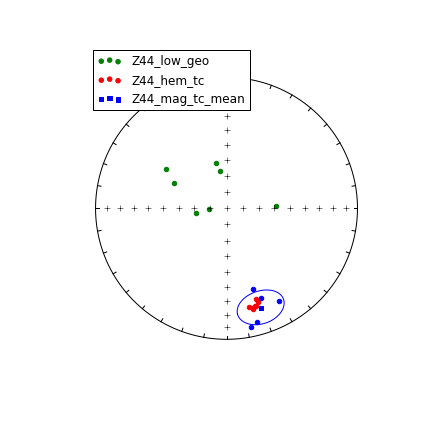

In [57]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[]
dec_l,inc_l = list(Z44_l_geo['specimen_dec'].values),list(Z44_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z44_l_tc['specimen_dec'].values),list(Z44_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z44_ma_tc['specimen_dec'].values),list(Z44_ma_tc['specimen_inc'].values)
dec_h,inc_h = list(Z44_h_tc['specimen_dec'].values),list(Z44_h_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z44_ma_geo['specimen_dec'].values),list(Z44_ma_geo['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z44_h_geo['specimen_dec'].values),list(Z44_h_geo['specimen_inc'].values)
Z44_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z44_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z44_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z44_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z44_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z44_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z44_low_tc_mean=pmag.fisher_mean(Z44_low_tc_dir) # calc means
Z44_mag_tc_mean=pmag.fisher_mean(Z44_mag_tc_dir)
Z44_hem_tc_mean=pmag.fisher_mean(Z44_hem_tc_dir)
Z44_low_geo_mean=pmag.fisher_mean(Z44_low_geo_dir) # calc means
Z44_mag_geo_mean=pmag.fisher_mean(Z44_mag_geo_dir)
Z44_hem_geo_mean=pmag.fisher_mean(Z44_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z44_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z44_hem_tc')
ipmag.plot_di_mean(Z44_mag_tc_mean['dec'],Z44_mag_tc_mean['inc'],
                  Z44_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z44_mag_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z45

Hematite, magnetite, and low temperature, LOW (less than 200ºC), components were calculated for Z45.

In [58]:
Z45_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z45']
Z45_geo = Z45_all[Z45_all['specimen_tilt_correction'] == 0]
Z45_tc = Z45_all[Z45_all['specimen_tilt_correction'] == 100]
Z45_tc.reset_index(inplace=True)
Z45_geo.reset_index(inplace=True)
Z45_l_geo = Z45_geo[Z45_geo['specimen_comp_name'] == 'LOW']
Z45_l_tc = Z45_tc[Z45_tc['specimen_comp_name'] == 'LOW']
Z45_ma_geo = Z45_geo[Z45_geo['specimen_comp_name'] == 'MAG']
Z45_h_geo = Z45_geo[Z45_geo['specimen_comp_name'] == 'HEM']
Z45_ma_tc = Z45_tc[Z45_tc['specimen_comp_name'] == 'MAG']
Z45_h_tc = Z45_tc[Z45_tc['specimen_comp_name'] == 'HEM']

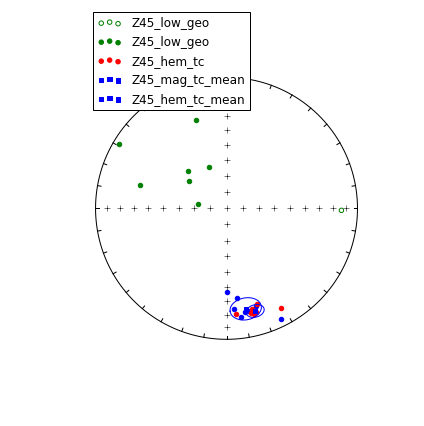

In [59]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[]
dec_l,inc_l = list(Z45_l_geo['specimen_dec'].values),list(Z45_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z45_l_tc['specimen_dec'].values),list(Z45_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z45_ma_tc['specimen_dec'].values),list(Z45_ma_tc['specimen_inc'].values)
dec_h,inc_h = list(Z45_h_tc['specimen_dec'].values),list(Z45_h_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z45_ma_geo['specimen_dec'].values),list(Z45_ma_geo['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z45_h_geo['specimen_dec'].values),list(Z45_h_geo['specimen_inc'].values)
Z45_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z45_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z45_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z45_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z45_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z45_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z45_low_tc_mean=pmag.fisher_mean(Z45_low_tc_dir) # calc means
Z45_mag_tc_mean=pmag.fisher_mean(Z45_mag_tc_dir)
Z45_hem_tc_mean=pmag.fisher_mean(Z45_hem_tc_dir)
Z45_low_geo_mean=pmag.fisher_mean(Z45_low_geo_dir) # calc means
Z45_mag_geo_mean=pmag.fisher_mean(Z45_mag_geo_dir)
Z45_hem_geo_mean=pmag.fisher_mean(Z45_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z45_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z45_hem_tc')
ipmag.plot_di_mean(Z45_mag_tc_mean['dec'],Z45_mag_tc_mean['inc'],
                  Z45_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z45_mag_tc_mean')
ipmag.plot_di_mean(Z45_hem_tc_mean['dec'],Z45_hem_tc_mean['inc'],
                  Z45_hem_tc_mean["alpha95"],color='b',marker='s',
                  label='Z45_hem_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z46

Hematite, magnetite, and low temperature, LOW (less than 200ºC), components were calculated for Z46.

In [60]:
Z46_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z46']
Z46_geo = Z46_all[Z46_all['specimen_tilt_correction'] == 0]
Z46_tc = Z46_all[Z46_all['specimen_tilt_correction'] == 100]
Z46_tc.reset_index(inplace=True)
Z46_geo.reset_index(inplace=True)
Z46_l_geo = Z46_geo[Z46_geo['specimen_comp_name'] == 'LOW']
Z46_l_tc = Z46_tc[Z46_tc['specimen_comp_name'] == 'LOW']
Z46_ma_geo = Z46_geo[Z46_geo['specimen_comp_name'] == 'MAG']
Z46_h_geo = Z46_geo[Z46_geo['specimen_comp_name'] == 'HEM']
Z46_ma_tc = Z46_tc[Z46_tc['specimen_comp_name'] == 'MAG']
Z46_h_tc = Z46_tc[Z46_tc['specimen_comp_name'] == 'HEM']

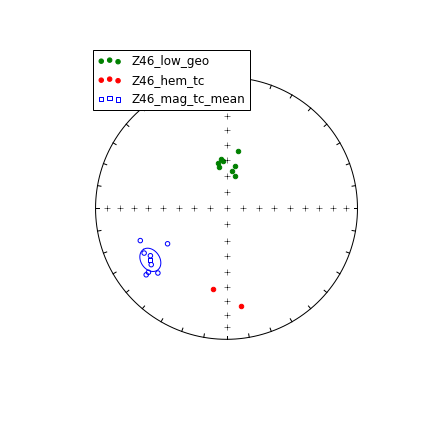

In [61]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[]
dec_l,inc_l = list(Z46_l_geo['specimen_dec'].values),list(Z46_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z46_l_tc['specimen_dec'].values),list(Z46_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z46_ma_tc['specimen_dec'].values),list(Z46_ma_tc['specimen_inc'].values)
dec_h,inc_h = list(Z46_h_tc['specimen_dec'].values),list(Z46_h_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z46_ma_geo['specimen_dec'].values),list(Z46_ma_geo['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z46_h_geo['specimen_dec'].values),list(Z46_h_geo['specimen_inc'].values)
Z46_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z46_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z46_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z46_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z46_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z46_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z46_low_tc_mean=pmag.fisher_mean(Z46_low_tc_dir) # calc means
Z46_mag_tc_mean=pmag.fisher_mean(Z46_mag_tc_dir)
Z46_hem_tc_mean=pmag.fisher_mean(Z46_hem_tc_dir)
Z46_low_geo_mean=pmag.fisher_mean(Z46_low_geo_dir) # calc means
Z46_mag_geo_mean=pmag.fisher_mean(Z46_mag_geo_dir)
Z46_hem_geo_mean=pmag.fisher_mean(Z46_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z46_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z46_hem_tc')
ipmag.plot_di_mean(Z46_mag_tc_mean['dec'],Z46_mag_tc_mean['inc'],
                  Z46_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z46_mag_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z47

Hematite, magnetite, and low temperature, LOW (less than 200ºC), components were calculated for Z47.

In [62]:
Z47_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z47']
Z47_geo = Z47_all[Z47_all['specimen_tilt_correction'] == 0]
Z47_tc = Z47_all[Z47_all['specimen_tilt_correction'] == 100]
Z47_tc.reset_index(inplace=True)
Z47_geo.reset_index(inplace=True)
Z47_l_geo = Z47_geo[Z47_geo['specimen_comp_name'] == 'LOW']
Z47_l_tc = Z47_tc[Z47_tc['specimen_comp_name'] == 'LOW']
Z47_ma_geo = Z47_geo[Z47_geo['specimen_comp_name'] == 'MAG']
Z47_h_geo = Z47_geo[Z47_geo['specimen_comp_name'] == 'HEM']
Z47_ma_tc = Z47_tc[Z47_tc['specimen_comp_name'] == 'MAG']
Z47_h_tc = Z47_tc[Z47_tc['specimen_comp_name'] == 'HEM']

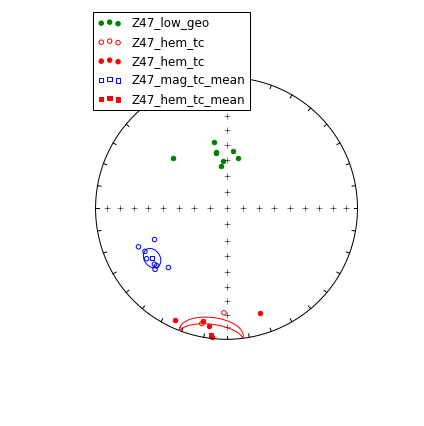

In [63]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[]
dec_l,inc_l = list(Z47_l_geo['specimen_dec'].values),list(Z47_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z47_l_tc['specimen_dec'].values),list(Z47_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z47_ma_tc['specimen_dec'].values),list(Z47_ma_tc['specimen_inc'].values)
dec_h,inc_h = list(Z47_h_tc['specimen_dec'].values),list(Z47_h_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z47_ma_geo['specimen_dec'].values),list(Z47_ma_geo['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z47_h_geo['specimen_dec'].values),list(Z47_h_geo['specimen_inc'].values)
Z47_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z47_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z47_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z47_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z47_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z47_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z47_low_tc_mean=pmag.fisher_mean(Z47_low_tc_dir) # calc means
Z47_mag_tc_mean=pmag.fisher_mean(Z47_mag_tc_dir)
Z47_hem_tc_mean=pmag.fisher_mean(Z47_hem_tc_dir)
Z47_low_geo_mean=pmag.fisher_mean(Z47_low_geo_dir) # calc means
Z47_mag_geo_mean=pmag.fisher_mean(Z47_mag_geo_dir)
Z47_hem_geo_mean=pmag.fisher_mean(Z47_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z47_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z47_hem_tc')
ipmag.plot_di_mean(Z47_mag_tc_mean['dec'],Z47_mag_tc_mean['inc'],
                  Z47_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z47_mag_tc_mean')
ipmag.plot_di_mean(Z47_hem_tc_mean['dec'],Z47_hem_tc_mean['inc'],
                  Z47_hem_tc_mean["alpha95"],color='r',marker='s',
                  label='Z47_hem_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z48

Hematite, magnetite, and low temperature, LOW (less than 200ºC), components were calculated for Z48.

In [64]:
Z48_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z48']
Z48_geo = Z48_all[Z48_all['specimen_tilt_correction'] == 0]
Z48_tc = Z48_all[Z48_all['specimen_tilt_correction'] == 100]
Z48_tc.reset_index(inplace=True)
Z48_geo.reset_index(inplace=True)
Z48_l_geo = Z48_geo[Z48_geo['specimen_comp_name'] == 'LOW']
Z48_l_tc = Z48_tc[Z48_tc['specimen_comp_name'] == 'LOW']
Z48_ma_geo = Z48_geo[Z48_geo['specimen_comp_name'] == 'MAG']
Z48_h_geo = Z48_geo[Z48_geo['specimen_comp_name'] == 'HEM']
Z48_ma_tc = Z48_tc[Z48_tc['specimen_comp_name'] == 'MAG']
Z48_h_tc = Z48_tc[Z48_tc['specimen_comp_name'] == 'HEM']

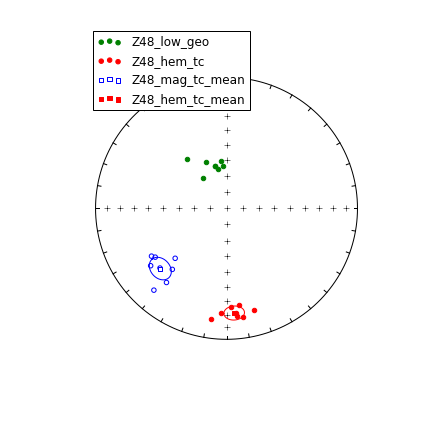

In [65]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[]
dec_l,inc_l = list(Z48_l_geo['specimen_dec'].values),list(Z48_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z48_l_tc['specimen_dec'].values),list(Z48_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z48_ma_tc['specimen_dec'].values),list(Z48_ma_tc['specimen_inc'].values)
dec_h,inc_h = list(Z48_h_tc['specimen_dec'].values),list(Z48_h_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z48_ma_geo['specimen_dec'].values),list(Z48_ma_geo['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z48_h_geo['specimen_dec'].values),list(Z48_h_geo['specimen_inc'].values)
Z48_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z48_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z48_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z48_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z48_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z48_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z48_low_tc_mean=pmag.fisher_mean(Z48_low_tc_dir) # calc means
Z48_mag_tc_mean=pmag.fisher_mean(Z48_mag_tc_dir)
Z48_hem_tc_mean=pmag.fisher_mean(Z48_hem_tc_dir)
Z48_low_geo_mean=pmag.fisher_mean(Z48_low_geo_dir) # calc means
Z48_mag_geo_mean=pmag.fisher_mean(Z48_mag_geo_dir)
Z48_hem_geo_mean=pmag.fisher_mean(Z48_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z48_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z48_hem_tc')
ipmag.plot_di_mean(Z48_mag_tc_mean['dec'],Z48_mag_tc_mean['inc'],
                  Z48_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z48_mag_tc_mean')
ipmag.plot_di_mean(Z48_hem_tc_mean['dec'],Z48_hem_tc_mean['inc'],
                  Z48_hem_tc_mean["alpha95"],color='r',marker='s',
                  label='Z48_hem_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z49

Hematite, magnetite, and low temperature, LOW (less than 200ºC), components were calculated for Z49.

In [66]:
Z49_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z49']
Z49_geo = Z49_all[Z49_all['specimen_tilt_correction'] == 0]
Z49_tc = Z49_all[Z49_all['specimen_tilt_correction'] == 100]
Z49_tc.reset_index(inplace=True)
Z49_geo.reset_index(inplace=True)
Z49_l_geo = Z49_geo[Z49_geo['specimen_comp_name'] == 'LOW']
Z49_l_tc = Z49_tc[Z49_tc['specimen_comp_name'] == 'LOW']
Z49_ma_geo = Z49_geo[Z49_geo['specimen_comp_name'] == 'MAG']
Z49_h_geo = Z49_geo[Z49_geo['specimen_comp_name'] == 'HEM']
Z49_ma_tc = Z49_tc[Z49_tc['specimen_comp_name'] == 'MAG']
Z49_h_tc = Z49_tc[Z49_tc['specimen_comp_name'] == 'HEM']

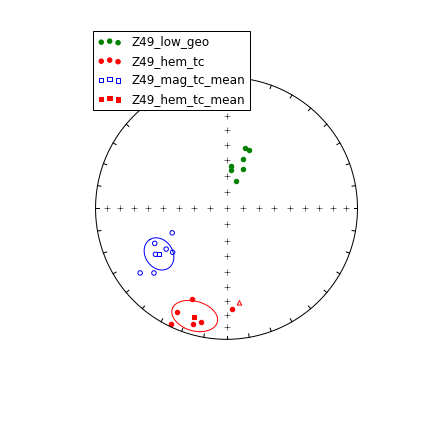

In [67]:
#Below are samples components that were dropped because they were clear outliers
#...magnetite components from samples Z51.1 and Z51.2 group with hematite...
#...components, inconsistent with the rest of the magnetite components
Z49_h_tc_edit,Z49_h_geo_edit = [],[]
Z49_h_tc_edit = Z49_h_tc
Z49_h_geo_edit = Z49_h_geo
Z49_h_tc_edit = Z49_h_tc_edit[Z49_h_tc_edit['er_sample_name'] != 'Z49.1'] 
Z49_h_geo_edit = Z49_h_geo_edit[Z49_h_geo_edit['er_sample_name'] != 'Z49.1'] 
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[]
dec_l,inc_l = list(Z49_l_geo['specimen_dec'].values),list(Z49_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z49_l_tc['specimen_dec'].values),list(Z49_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z49_ma_tc['specimen_dec'].values),list(Z49_ma_tc['specimen_inc'].values)
dec_h,inc_h = list(Z49_h_tc_edit['specimen_dec'].values),list(Z49_h_tc_edit['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z49_ma_geo['specimen_dec'].values),list(Z49_ma_geo['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z49_h_geo_edit['specimen_dec'].values),list(Z49_h_geo_edit['specimen_inc'].values)
Z49_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z49_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z49_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z49_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z49_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z49_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z49_low_tc_mean=pmag.fisher_mean(Z49_low_tc_dir) # calc means
Z49_mag_tc_mean=pmag.fisher_mean(Z49_mag_tc_dir)
Z49_hem_tc_mean=pmag.fisher_mean(Z49_hem_tc_dir)
Z49_low_geo_mean=pmag.fisher_mean(Z49_low_geo_dir) # calc means
Z49_mag_geo_mean=pmag.fisher_mean(Z49_mag_geo_dir)
Z49_hem_geo_mean=pmag.fisher_mean(Z49_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z49_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z49_hem_tc')
ipmag.plot_di(Z49_h_tc[Z49_h_tc['er_sample_name']=='Z49.1']['specimen_dec'].values,
              Z49_h_tc[Z49_h_tc['er_sample_name']=='Z49.1']['specimen_inc'].values,color='r',marker='^')
ipmag.plot_di_mean(Z49_mag_tc_mean['dec'],Z49_mag_tc_mean['inc'],
                  Z49_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z49_mag_tc_mean')
ipmag.plot_di_mean(Z49_hem_tc_mean['dec'],Z49_hem_tc_mean['inc'],
                  Z49_hem_tc_mean["alpha95"],color='r',marker='s',
                  label='Z49_hem_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z50

Only magnetite and hematite components could be distinguished from the demagnetization data or flow Z50.

In [68]:
Z50_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z50']
Z50_geo = Z50_all[Z50_all['specimen_tilt_correction'] == 0]
Z50_tc = Z50_all[Z50_all['specimen_tilt_correction'] == 100]
Z50_tc.reset_index(inplace=True)
Z50_geo.reset_index(inplace=True)
Z50_h_geo = Z50_geo[Z50_geo['specimen_comp_name'] == 'HEM']
Z50_h_tc = Z50_tc[Z50_tc['specimen_comp_name'] == 'HEM']
Z50_ma_tc = Z50_tc[Z50_tc['specimen_comp_name'] == 'MAG']
Z50_ma_geo = Z50_geo[Z50_geo['specimen_comp_name'] == 'MAG']

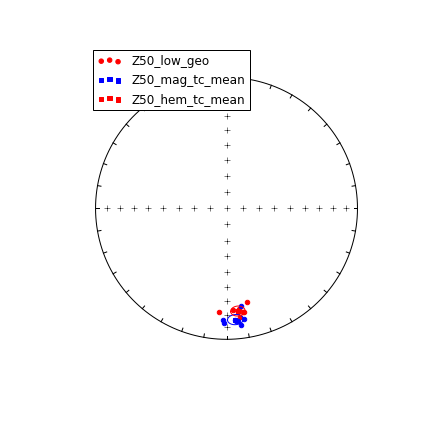

In [69]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_h,inc_h,dec_ma,inc_ma = [],[],[],[]
dec_h_geo,inc_h_geo,dec_ma_geo,inc_ma_geo = [],[],[],[]
dec_h,inc_h = list(Z50_h_tc['specimen_dec'].values),list(Z50_h_tc['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z50_h_geo['specimen_dec'].values),list(Z50_h_geo['specimen_inc'].values)
dec_ma,inc_ma = list(Z50_ma_tc['specimen_dec'].values),list(Z50_ma_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z50_ma_geo['specimen_dec'].values),list(Z50_ma_geo['specimen_inc'].values)
Z50_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo) # make unit vectors for pmag.fisher_mean()
Z50_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h) # make unit vectors for pmag.fisher_mean()
Z50_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z50_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z50_hem_tc_mean=pmag.fisher_mean(Z50_hem_tc_dir) # calc means
Z50_mag_tc_mean=pmag.fisher_mean(Z50_mag_tc_dir)
Z50_hem_geo_mean=pmag.fisher_mean(Z50_hem_geo_dir) 
Z50_mag_geo_mean=pmag.fisher_mean(Z50_mag_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_h,inc_h,color='r',label='Z50_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='b')
ipmag.plot_di_mean(Z50_mag_tc_mean['dec'],Z50_mag_tc_mean['inc'],
                  Z50_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z50_mag_tc_mean')
ipmag.plot_di_mean(Z50_hem_tc_mean['dec'],Z50_hem_tc_mean['inc'],
                  Z50_hem_tc_mean["alpha95"],color='r',marker='s',
                  label='Z50_hem_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z51

Hematite, magnetite, and low temperature, LOW (less than 200ºC), components were calculated for Z51.

In [70]:
Z51_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z51']
Z51_geo = Z51_all[Z51_all['specimen_tilt_correction'] == 0]
Z51_tc = Z51_all[Z51_all['specimen_tilt_correction'] == 100]
Z51_tc.reset_index(inplace=True)
Z51_geo.reset_index(inplace=True)
Z51_l_geo = Z51_geo[Z51_geo['specimen_comp_name'] == 'LOW']
Z51_l_tc = Z51_tc[Z51_tc['specimen_comp_name'] == 'LOW']
Z51_ma_geo = Z51_geo[Z51_geo['specimen_comp_name'] == 'MAG']
Z51_h_geo = Z51_geo[Z51_geo['specimen_comp_name'] == 'HEM']
Z51_ma_tc = Z51_tc[Z51_tc['specimen_comp_name'] == 'MAG']
Z51_h_tc = Z51_tc[Z51_tc['specimen_comp_name'] == 'HEM']

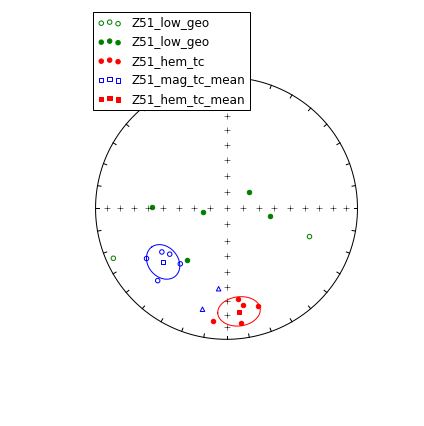

In [71]:
#Below are samples components that were dropped because they were clear outliers
#...magnetite components from samples Z51.1 and Z51.2 group with hematite...
#...components, inconsistent with the rest of the magnetite components
Z51_ma_tc_edit,Z51_ma_geo_edit = [],[]
Z51_ma_tc_edit = Z51_ma_tc
Z51_ma_geo_edit = Z51_ma_geo
Z51_ma_tc_edit = Z51_ma_tc_edit[Z51_ma_tc_edit['er_sample_name'] != 'Z51.1']
Z51_ma_tc_edit = Z51_ma_tc_edit[Z51_ma_tc_edit['er_sample_name'] != 'Z51.2']
Z51_ma_geo_edit = Z51_ma_geo_edit[Z51_ma_geo_edit['er_sample_name'] != 'Z51.1']
Z51_ma_geo_edit = Z51_ma_geo_edit[Z51_ma_geo_edit['er_sample_name'] != 'Z51.2']
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[]
dec_l,inc_l = list(Z51_l_geo['specimen_dec'].values),list(Z51_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z51_l_tc['specimen_dec'].values),list(Z51_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z51_ma_tc_edit['specimen_dec'].values),list(Z51_ma_tc_edit['specimen_inc'].values)
dec_h,inc_h = list(Z51_h_tc['specimen_dec'].values),list(Z51_h_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z51_ma_geo_edit['specimen_dec'].values),list(Z51_ma_geo_edit['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z51_h_geo['specimen_dec'].values),list(Z51_h_geo['specimen_inc'].values)
Z51_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z51_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z51_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z51_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z51_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z51_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z51_low_tc_mean=pmag.fisher_mean(Z51_low_tc_dir) # calc means
Z51_mag_tc_mean=pmag.fisher_mean(Z51_mag_tc_dir)
Z51_hem_tc_mean=pmag.fisher_mean(Z51_hem_tc_dir)
Z51_low_geo_mean=pmag.fisher_mean(Z51_low_geo_dir) # calc means
Z51_mag_geo_mean=pmag.fisher_mean(Z51_mag_geo_dir)
Z51_hem_geo_mean=pmag.fisher_mean(Z51_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z51_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
#plot excluded components as triangles on equal-area plot
ipmag.plot_di(Z51_ma_tc[Z51_ma_tc['er_sample_name']=='Z51.1']['specimen_dec'].values,
              Z51_ma_tc[Z51_ma_tc['er_sample_name']=='Z51.1']['specimen_inc'].values,color='b',marker='^')
ipmag.plot_di(Z51_ma_tc[Z51_ma_tc['er_sample_name']=='Z51.2']['specimen_dec'].values,
              Z51_ma_tc[Z51_ma_tc['er_sample_name']=='Z51.2']['specimen_inc'].values,color='b',marker='^')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z51_hem_tc')
ipmag.plot_di_mean(Z51_mag_tc_mean['dec'],Z51_mag_tc_mean['inc'],
                  Z51_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z51_mag_tc_mean')
ipmag.plot_di_mean(Z51_hem_tc_mean['dec'],Z51_hem_tc_mean['inc'],
                  Z51_hem_tc_mean["alpha95"],color='r',marker='s',
                  label='Z51_hem_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

Magnetite components from two samples (Z51.1 and Z51.2) were excluded because of their similarity to hematite components (the hematite remanence mixed with that of magnetite) and different demagnetization behavior compared to the other magnetite components.

#### Z52

Hematite, magnetite, and low temperature, LOW (less than 200ºC), components were calculated for Z52.

In [72]:
Z52_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z52']
Z52_geo = Z52_all[Z52_all['specimen_tilt_correction'] == 0]
Z52_tc = Z52_all[Z52_all['specimen_tilt_correction'] == 100]
Z52_tc.reset_index(inplace=True)
Z52_geo.reset_index(inplace=True)
Z52_l_geo = Z52_geo[Z52_geo['specimen_comp_name'] == 'LOW']
Z52_l_tc = Z52_tc[Z52_tc['specimen_comp_name'] == 'LOW']
Z52_ma_geo = Z52_geo[Z52_geo['specimen_comp_name'] == 'MAG']
Z52_h_geo = Z52_geo[Z52_geo['specimen_comp_name'] == 'HEM']
Z52_ma_tc = Z52_tc[Z52_tc['specimen_comp_name'] == 'MAG']
Z52_h_tc = Z52_tc[Z52_tc['specimen_comp_name'] == 'HEM']

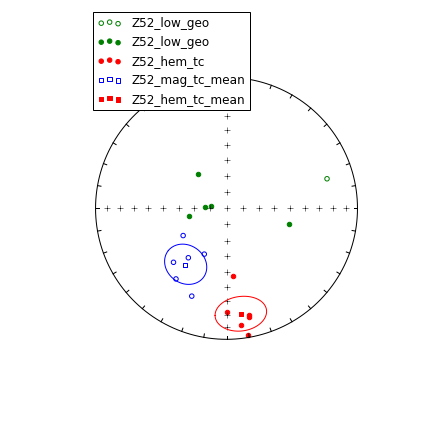

In [73]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[]
dec_l,inc_l = list(Z52_l_geo['specimen_dec'].values),list(Z52_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z52_l_tc['specimen_dec'].values),list(Z52_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z52_ma_tc['specimen_dec'].values),list(Z52_ma_tc['specimen_inc'].values)
dec_h,inc_h = list(Z52_h_tc['specimen_dec'].values),list(Z52_h_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z52_ma_geo['specimen_dec'].values),list(Z52_ma_geo['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z52_h_geo['specimen_dec'].values),list(Z52_h_geo['specimen_inc'].values)
Z52_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z52_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z52_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z52_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z52_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z52_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z52_low_tc_mean=pmag.fisher_mean(Z52_low_tc_dir) # calc means
Z52_mag_tc_mean=pmag.fisher_mean(Z52_mag_tc_dir)
Z52_hem_tc_mean=pmag.fisher_mean(Z52_hem_tc_dir)
Z52_low_geo_mean=pmag.fisher_mean(Z52_low_geo_dir) # calc means
Z52_mag_geo_mean=pmag.fisher_mean(Z52_mag_geo_dir)
Z52_hem_geo_mean=pmag.fisher_mean(Z52_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z52_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z52_hem_tc')
ipmag.plot_di_mean(Z52_mag_tc_mean['dec'],Z52_mag_tc_mean['inc'],
                  Z52_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z52_mag_tc_mean')
ipmag.plot_di_mean(Z52_hem_tc_mean['dec'],Z52_hem_tc_mean['inc'],
                  Z52_hem_tc_mean["alpha95"],color='r',marker='s',
                  label='Z52_hem_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z53

Hematite, magnetite, and low temperature, LOW (less than 200ºC), components were calculated for Z53.

In [74]:
Z53_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z53']
Z53_geo = Z53_all[Z53_all['specimen_tilt_correction'] == 0]
Z53_tc = Z53_all[Z53_all['specimen_tilt_correction'] == 100]
Z53_tc.reset_index(inplace=True)
Z53_geo.reset_index(inplace=True)
Z53_l_geo = Z53_geo[Z53_geo['specimen_comp_name'] == 'LOW']
Z53_l_tc = Z53_tc[Z53_tc['specimen_comp_name'] == 'LOW']
Z53_ma_geo = Z53_geo[Z53_geo['specimen_comp_name'] == 'MAG']
Z53_h_geo = Z53_geo[Z53_geo['specimen_comp_name'] == 'HEM']
Z53_ma_tc = Z53_tc[Z53_tc['specimen_comp_name'] == 'MAG']
Z53_h_tc = Z53_tc[Z53_tc['specimen_comp_name'] == 'HEM']

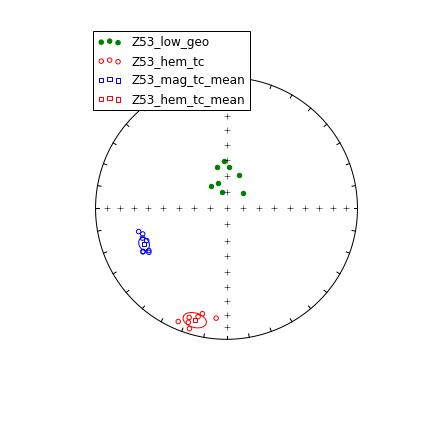

In [75]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[]
dec_l,inc_l = list(Z53_l_geo['specimen_dec'].values),list(Z53_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z53_l_tc['specimen_dec'].values),list(Z53_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z53_ma_tc['specimen_dec'].values),list(Z53_ma_tc['specimen_inc'].values)
dec_h,inc_h = list(Z53_h_tc['specimen_dec'].values),list(Z53_h_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z53_ma_geo['specimen_dec'].values),list(Z53_ma_geo['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z53_h_geo['specimen_dec'].values),list(Z53_h_geo['specimen_inc'].values)
Z53_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z53_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z53_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z53_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z53_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z53_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z53_low_tc_mean=pmag.fisher_mean(Z53_low_tc_dir) # calc means
Z53_mag_tc_mean=pmag.fisher_mean(Z53_mag_tc_dir)
Z53_hem_tc_mean=pmag.fisher_mean(Z53_hem_tc_dir)
Z53_low_geo_mean=pmag.fisher_mean(Z53_low_geo_dir) # calc means
Z53_mag_geo_mean=pmag.fisher_mean(Z53_mag_geo_dir)
Z53_hem_geo_mean=pmag.fisher_mean(Z53_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z53_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z53_hem_tc')
ipmag.plot_di_mean(Z53_mag_tc_mean['dec'],Z53_mag_tc_mean['inc'],
                  Z53_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z53_mag_tc_mean')
ipmag.plot_di_mean(Z53_hem_tc_mean['dec'],Z53_hem_tc_mean['inc'],
                  Z53_hem_tc_mean["alpha95"],color='r',marker='s',
                  label='Z53_hem_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z54

Hematite, magnetite, and low temperature, LOW (less than 200ºC), components were calculated for Z54.

In [76]:
Z54_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z54']
Z54_geo = Z54_all[Z54_all['specimen_tilt_correction'] == 0]
Z54_tc = Z54_all[Z54_all['specimen_tilt_correction'] == 100]
Z54_tc.reset_index(inplace=True)
Z54_geo.reset_index(inplace=True)
Z54_l_geo = Z54_geo[Z54_geo['specimen_comp_name'] == 'LOW']
Z54_l_tc = Z54_tc[Z54_tc['specimen_comp_name'] == 'LOW']
Z54_ma_geo = Z54_geo[Z54_geo['specimen_comp_name'] == 'MAG']
Z54_h_geo = Z54_geo[Z54_geo['specimen_comp_name'] == 'HEM']
Z54_ma_tc = Z54_tc[Z54_tc['specimen_comp_name'] == 'MAG']
Z54_h_tc = Z54_tc[Z54_tc['specimen_comp_name'] == 'HEM']

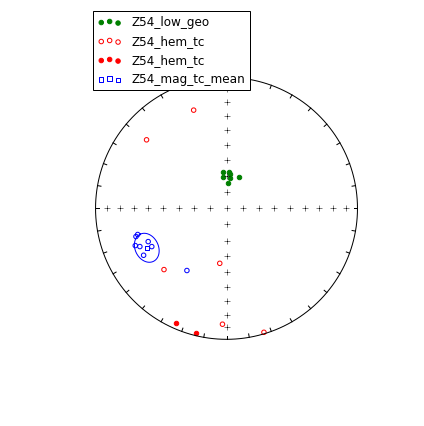

In [130]:
#remove the odd samples from the LOW temperature group
Z54_l_tc_edit,Z54_l_geo_edit = [],[]
Z54_l_tc_edit = Z54_l_tc
Z54_l_geo_edit = Z54_l_geo
Z54_l_tc_edit = Z54_l_tc_edit[Z54_l_tc_edit['er_sample_name'] != 'Z54.5']
Z54_l_geo_edit = Z54_l_geo_edit[Z54_l_geo_edit['er_sample_name'] != 'Z54.5']
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[]
dec_l,inc_l = list(Z54_l_geo_edit['specimen_dec'].values),list(Z54_l_geo_edit['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z54_l_tc_edit['specimen_dec'].values),list(Z54_l_tc_edit['specimen_inc'].values)
dec_ma,inc_ma = list(Z54_ma_tc['specimen_dec'].values),list(Z54_ma_tc['specimen_inc'].values)
dec_h,inc_h = list(Z54_h_tc['specimen_dec'].values),list(Z54_h_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z54_ma_geo['specimen_dec'].values),list(Z54_ma_geo['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z54_h_geo['specimen_dec'].values),list(Z54_h_geo['specimen_inc'].values)
Z54_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z54_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z54_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z54_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z54_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z54_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z54_low_tc_mean=pmag.fisher_mean(Z54_low_tc_dir) # calc means
Z54_mag_tc_mean=pmag.fisher_mean(Z54_mag_tc_dir)
Z54_hem_tc_mean=pmag.fisher_mean(Z54_hem_tc_dir)
Z54_low_geo_mean=pmag.fisher_mean(Z54_low_geo_dir) # calc means
Z54_mag_geo_mean=pmag.fisher_mean(Z54_mag_geo_dir)
Z54_hem_geo_mean=pmag.fisher_mean(Z54_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z54_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z54_hem_tc')
ipmag.plot_di_mean(Z54_mag_tc_mean['dec'],Z54_mag_tc_mean['inc'],
                  Z54_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z54_mag_tc_mean')
plt.legend(loc=(.15,.8))
plt.show()

#### Z55

Magnetite and low-temperature, LOW (less than 200ºC), components were calculated for Z55.

In [78]:
Z55_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z55']
Z55_geo = Z55_all[Z55_all['specimen_tilt_correction'] == 0]
Z55_tc = Z55_all[Z55_all['specimen_tilt_correction'] == 100]
Z55_tc.reset_index(inplace=True)
Z55_geo.reset_index(inplace=True)
Z55_l_geo = Z55_geo[Z55_geo['specimen_comp_name'] == 'LOW']
Z55_l_tc = Z55_tc[Z55_tc['specimen_comp_name'] == 'LOW']
Z55_ma_tc = Z55_tc[Z55_tc['specimen_comp_name'] == 'MAG']
Z55_ma_geo = Z55_geo[Z55_geo['specimen_comp_name'] == 'MAG']

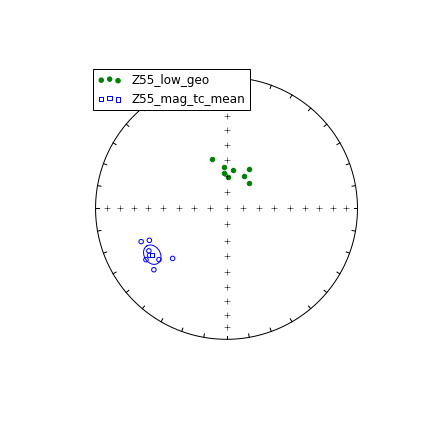

In [79]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma = [],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo = [],[],[],[]
dec_l,inc_l = list(Z55_l_geo['specimen_dec'].values),list(Z55_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z55_l_tc['specimen_dec'].values),list(Z55_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z55_ma_tc['specimen_dec'].values),list(Z55_ma_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z55_ma_geo['specimen_dec'].values),list(Z55_ma_geo['specimen_inc'].values)
Z55_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z55_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc) # make unit vectors for pmag.fisher_mean()
Z55_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z55_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z55_low_tc_mean=pmag.fisher_mean(Z55_low_tc_dir) # calc means
Z55_mag_tc_mean=pmag.fisher_mean(Z55_mag_tc_dir)
Z55_low_geo_mean=pmag.fisher_mean(Z55_low_geo_dir) 
Z55_mag_geo_mean=pmag.fisher_mean(Z55_mag_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z55_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di_mean(Z55_mag_tc_mean['dec'],Z55_mag_tc_mean['inc'],
                  Z55_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z55_mag_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

#### Z56

Hematite, magnetite, and low temperature, LOW (less than 200ºC), components were calculated for Z56.

In [80]:
Z56_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z56']
Z56_geo = Z56_all[Z56_all['specimen_tilt_correction'] == 0]
Z56_tc = Z56_all[Z56_all['specimen_tilt_correction'] == 100]
Z56_tc.reset_index(inplace=True)
Z56_geo.reset_index(inplace=True)
Z56_l_geo = Z56_geo[Z56_geo['specimen_comp_name'] == 'LOW']
Z56_l_tc = Z56_tc[Z56_tc['specimen_comp_name'] == 'LOW']
Z56_ma_geo = Z56_geo[Z56_geo['specimen_comp_name'] == 'MAG']
Z56_h_geo = Z56_geo[Z56_geo['specimen_comp_name'] == 'HEM']
Z56_ma_tc = Z56_tc[Z56_tc['specimen_comp_name'] == 'MAG']
Z56_h_tc = Z56_tc[Z56_tc['specimen_comp_name'] == 'HEM']

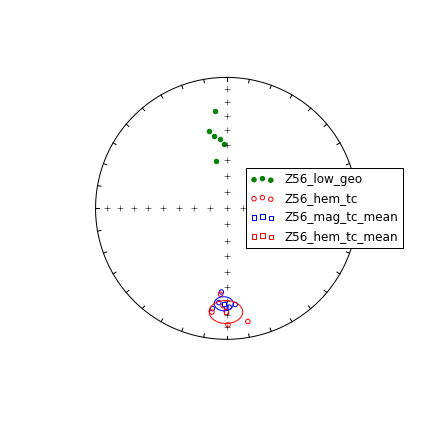

In [81]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[]
dec_l,inc_l = list(Z56_l_geo['specimen_dec'].values),list(Z56_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z56_l_tc['specimen_dec'].values),list(Z56_l_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z56_ma_tc['specimen_dec'].values),list(Z56_ma_tc['specimen_inc'].values)
dec_h,inc_h = list(Z56_h_tc['specimen_dec'].values),list(Z56_h_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z56_ma_geo['specimen_dec'].values),list(Z56_ma_geo['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z56_h_geo['specimen_dec'].values),list(Z56_h_geo['specimen_inc'].values)
Z56_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z56_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z56_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z56_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z56_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z56_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z56_low_tc_mean=pmag.fisher_mean(Z56_low_tc_dir) # calc means
Z56_mag_tc_mean=pmag.fisher_mean(Z56_mag_tc_dir)
Z56_hem_tc_mean=pmag.fisher_mean(Z56_hem_tc_dir)
Z56_low_geo_mean=pmag.fisher_mean(Z56_low_geo_dir) # calc means
Z56_mag_geo_mean=pmag.fisher_mean(Z56_mag_geo_dir)
Z56_hem_geo_mean=pmag.fisher_mean(Z56_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z56_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z56_hem_tc')
ipmag.plot_di_mean(Z56_mag_tc_mean['dec'],Z56_mag_tc_mean['inc'],
                  Z56_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z56_mag_tc_mean')
ipmag.plot_di_mean(Z56_hem_tc_mean['dec'],Z56_hem_tc_mean['inc'],
                  Z56_hem_tc_mean["alpha95"],color='r',marker='s',
                  label='Z56_hem_tc_mean')
plt.legend(loc=(.55,.4))
plt.show()

The directions from flow Z56 are very different from the rest of the sites. This may be due to the fact that these flows are from a different outcrop panel to the southeast of the majority of sites. The tilt correction for this panel may have led to these differences. It is also possible that the differences in directions is due to different (younger) age of flows Z56, Z57, and Z58. The magnetite and hematite components are the same, perhaps *the result of overprinted magnetite that yield the same directions as hematite components*.

#### Z57

Hematite, magnetite, and low temperature, LOW (less than 200ºC), components were calculated for Z57.

In [82]:
Z57_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z57']
Z57_geo = Z57_all[Z57_all['specimen_tilt_correction'] == 0]
Z57_tc = Z57_all[Z57_all['specimen_tilt_correction'] == 100]
Z57_tc.reset_index(inplace=True)
Z57_geo.reset_index(inplace=True)
Z57_l_geo = Z57_geo[Z57_geo['specimen_comp_name'] == 'LOW']
Z57_l_tc = Z57_tc[Z57_tc['specimen_comp_name'] == 'LOW']
Z57_ma_geo = Z57_geo[Z57_geo['specimen_comp_name'] == 'MAG']
Z57_h_geo = Z57_geo[Z57_geo['specimen_comp_name'] == 'HEM']
Z57_ma_tc = Z57_tc[Z57_tc['specimen_comp_name'] == 'MAG']
Z57_h_tc = Z57_tc[Z57_tc['specimen_comp_name'] == 'HEM']

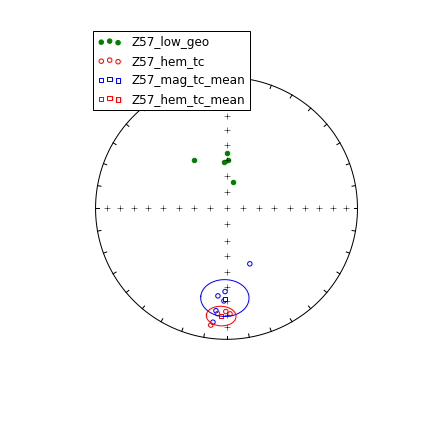

In [83]:
#remove the odd samples from the LOW temperature group
Z57_l_tc_edit,Z57_l_geo_edit = [],[]
Z57_l_tc_edit = Z57_l_tc
Z57_l_geo_edit = Z57_l_geo
Z57_l_tc_edit = Z57_l_tc_edit[Z57_l_tc_edit['er_sample_name'] != 'Z57.5']
Z57_l_geo_edit = Z57_l_geo_edit[Z57_l_geo_edit['er_sample_name'] != 'Z57.5']
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_ma,inc_ma,dec_h,inc_h = [],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_ma_geo,inc_ma_geo,dec_h_geo,inc_h_geo = [],[],[],[],[],[]
dec_l,inc_l = list(Z57_l_geo_edit['specimen_dec'].values),list(Z57_l_geo_edit['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z57_l_tc_edit['specimen_dec'].values),list(Z57_l_tc_edit['specimen_inc'].values)
dec_ma,inc_ma = list(Z57_ma_tc['specimen_dec'].values),list(Z57_ma_tc['specimen_inc'].values)
dec_h,inc_h = list(Z57_h_tc['specimen_dec'].values),list(Z57_h_tc['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z57_ma_geo['specimen_dec'].values),list(Z57_ma_geo['specimen_inc'].values)
dec_h_geo,inc_h_geo = list(Z57_h_geo['specimen_dec'].values),list(Z57_h_geo['specimen_inc'].values)
Z57_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z57_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z57_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z57_hem_tc_dir = ipmag.make_di_block(dec_h,inc_h)
Z57_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z57_hem_geo_dir = ipmag.make_di_block(dec_h_geo,inc_h_geo)
Z57_low_tc_mean=pmag.fisher_mean(Z57_low_tc_dir) # calc means
Z57_mag_tc_mean=pmag.fisher_mean(Z57_mag_tc_dir)
Z57_hem_tc_mean=pmag.fisher_mean(Z57_hem_tc_dir)
Z57_low_geo_mean=pmag.fisher_mean(Z57_low_geo_dir) # calc means
Z57_mag_geo_mean=pmag.fisher_mean(Z57_mag_geo_dir)
Z57_hem_geo_mean=pmag.fisher_mean(Z57_hem_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z57_low_geo')
ipmag.plot_di(dec_ma,inc_ma,color='blue')
ipmag.plot_di(dec_h,inc_h,color='red',label='Z57_hem_tc')
ipmag.plot_di_mean(Z57_mag_tc_mean['dec'],Z57_mag_tc_mean['inc'],
                  Z57_mag_tc_mean["alpha95"],color='b',marker='s',
                  label='Z57_mag_tc_mean')
ipmag.plot_di_mean(Z57_hem_tc_mean['dec'],Z57_hem_tc_mean['inc'],
                  Z57_hem_tc_mean["alpha95"],color='r',marker='s',
                  label='Z57_hem_tc_mean')
plt.legend(loc=(.15,.75))
plt.show()

Similar story to flow Z56 - with stark similarities between the magnetite and hematite components.

#### Z58

Magnetite, mid-, and low- temperature, LOW (less than 200ºC), components were calculated for Z58. The middle temperature component derives from demagnetization steps between LOW and magnetite.

In [84]:
Z58_all = Teel_data_raw[Teel_data_raw['er_site_name'] == 'Z58']
Z58_geo = Z58_all[Z58_all['specimen_tilt_correction'] == 0]
Z58_tc = Z58_all[Z58_all['specimen_tilt_correction'] == 100]
Z58_tc.reset_index(inplace=True)
Z58_geo.reset_index(inplace=True)
Z58_l_geo = Z58_geo[Z58_geo['specimen_comp_name'] == 'LOW']
Z58_l_tc = Z58_tc[Z58_tc['specimen_comp_name'] == 'LOW']
Z58_ma_geo = Z58_geo[Z58_geo['specimen_comp_name'] == 'MAG']
Z58_ma_tc = Z58_tc[Z58_tc['specimen_comp_name'] == 'MAG']
Z58_mi_tc = Z58_tc[Z58_tc['specimen_comp_name'] == 'MID']
Z58_mi_geo = Z58_geo[Z58_geo['specimen_comp_name'] == 'MID']

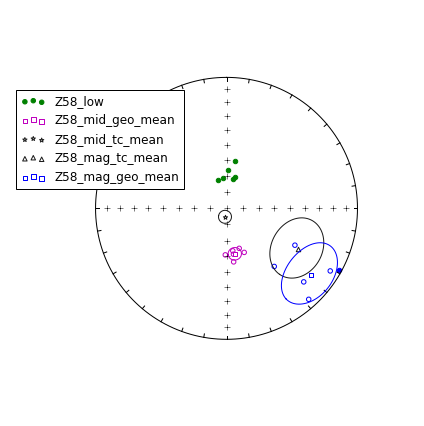

In [85]:
#make lists of dec/inc for each component which are needed for plotting and mean calc
dec_l,inc_l,dec_mi,inc_mi,dec_ma,inc_ma = [],[],[],[],[],[]
dec_l_tc,inc_l_tc,dec_mi_geo,inc_mi_geo,dec_ma_geo,inc_ma_geo = [],[],[],[],[],[]
dec_l,inc_l = list(Z58_l_geo['specimen_dec'].values),list(Z58_l_geo['specimen_inc'].values)
dec_l_tc,inc_l_tc = list(Z58_l_tc['specimen_dec'].values),list(Z58_l_tc['specimen_inc'].values)
dec_mi,inc_mi = list(Z58_mi_tc['specimen_dec'].values),list(Z58_mi_tc['specimen_inc'].values)
dec_ma,inc_ma = list(Z58_ma_tc['specimen_dec'].values),list(Z58_ma_tc['specimen_inc'].values)
dec_mi_geo,inc_mi_geo = list(Z58_mi_geo['specimen_dec'].values),list(Z58_mi_geo['specimen_inc'].values)
dec_ma_geo,inc_ma_geo = list(Z58_ma_geo['specimen_dec'].values),list(Z58_ma_geo['specimen_inc'].values)
Z58_low_geo_dir = ipmag.make_di_block(dec_l,inc_l) # make unit vectors for pmag.fisher_mean()
Z58_low_tc_dir = ipmag.make_di_block(dec_l_tc,inc_l_tc)
Z58_mid_tc_dir = ipmag.make_di_block(dec_mi,inc_mi)
Z58_mag_tc_dir = ipmag.make_di_block(dec_ma,inc_ma)
Z58_mid_geo_dir = ipmag.make_di_block(dec_mi_geo,inc_mi_geo)
Z58_mag_geo_dir = ipmag.make_di_block(dec_ma_geo,inc_ma_geo)
Z58_low_tc_mean=pmag.fisher_mean(Z58_low_tc_dir) # calc means
Z58_mid_tc_mean=pmag.fisher_mean(Z58_mid_tc_dir)
Z58_mag_tc_mean=pmag.fisher_mean(Z58_mag_tc_dir)
Z58_low_geo_mean=pmag.fisher_mean(Z58_low_geo_dir) # calc means
Z58_mid_geo_mean=pmag.fisher_mean(Z58_mid_geo_dir)
Z58_mag_geo_mean=pmag.fisher_mean(Z58_mag_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(dec_l,inc_l,color='green',label='Z58_low')
ipmag.plot_di(dec_mi_geo,inc_mi_geo,color='m')
ipmag.plot_di(dec_ma_geo,inc_ma_geo,color='b')
ipmag.plot_di_mean(Z58_mid_geo_mean['dec'],Z58_mid_geo_mean['inc'],
                  Z58_mid_geo_mean["alpha95"],color='m',marker='s',
                  label='Z58_mid_geo_mean')
ipmag.plot_di_mean(Z58_mid_tc_mean['dec'],Z58_mid_tc_mean['inc'],
                  Z58_mid_tc_mean["alpha95"],color='0.1',marker='*',
                  label='Z58_mid_tc_mean')
ipmag.plot_di_mean(Z58_mag_tc_mean['dec'],Z58_mag_tc_mean['inc'],
                  Z58_mag_tc_mean["alpha95"],color='0.1',marker='^',
                  label='Z58_mag_tc_mean')
ipmag.plot_di_mean(Z58_mag_geo_mean['dec'],Z58_mag_geo_mean['inc'],
                  Z58_mag_geo_mean["alpha95"],color='b',marker='s',
                  label='Z58_mag_geo_mean')
plt.legend(loc=(-0.05,.55))
plt.show()

Results from flow Z58 are very different from all of the other sites.

### Paleomagnetic data summary

Create tables, distinguished by component type, of mean directions for all Teel flows.

#### Magnetitie directions

##### Geographic coordinates

In [89]:
# Convert mean direction dictionaries to dataframes
Z30_mag_geo = pd.DataFrame.from_dict({'Z30_mag_geo':Z30_mag_geo_mean}, orient='index')
Z31_mag_geo = pd.DataFrame.from_dict({'Z31_mag_geo':Z31_mag_geo_mean}, orient='index')
Z32_mag_geo = pd.DataFrame.from_dict({'Z32_mag_geo':Z32_mag_geo_mean}, orient='index')
Z33_mag_geo = pd.DataFrame.from_dict({'Z33_mag_geo':Z33_mag_geo_mean}, orient='index')
Z34_mag_geo = pd.DataFrame.from_dict({'Z34_mag_geo':Z34_mag_geo_mean}, orient='index')
Z35_mag_geo = pd.DataFrame.from_dict({'Z35_mag_geo':Z35_mag_geo_mean}, orient='index')
Z36_mag_geo = pd.DataFrame.from_dict({'Z36_mag_geo':Z36_mag_geo_mean}, orient='index')
Z37_mag_geo = pd.DataFrame.from_dict({'Z37_mag_geo':Z37_mag_geo_mean}, orient='index')
Z38_mag_geo = pd.DataFrame.from_dict({'Z38_mag_geo':Z38_mag_geo_mean}, orient='index')
Z39_mag_geo = pd.DataFrame.from_dict({'Z39_mag_geo':Z39_mag_geo_mean}, orient='index')
Z40_mag_geo = pd.DataFrame.from_dict({'Z40_mag_geo':Z40_mag_geo_mean}, orient='index')
Z41_mag_geo = pd.DataFrame.from_dict({'Z41_mag_geo':Z41_mag_geo_mean}, orient='index')
Z42_mag_geo = pd.DataFrame.from_dict({'Z42_mag_geo':Z42_mag_geo_mean}, orient='index')
Z43_mag_geo = pd.DataFrame.from_dict({'Z43_mag_geo':Z43_mag_geo_mean}, orient='index')
Z44_mag_geo = pd.DataFrame.from_dict({'Z44_mag_geo':Z44_mag_geo_mean}, orient='index')
Z45_mag_geo = pd.DataFrame.from_dict({'Z45_mag_geo':Z45_mag_geo_mean}, orient='index')
Z46_mag_geo = pd.DataFrame.from_dict({'Z46_mag_geo':Z46_mag_geo_mean}, orient='index')
Z47_mag_geo = pd.DataFrame.from_dict({'Z47_mag_geo':Z47_mag_geo_mean}, orient='index')
Z48_mag_geo = pd.DataFrame.from_dict({'Z48_mag_geo':Z48_mag_geo_mean}, orient='index')
Z49_mag_geo = pd.DataFrame.from_dict({'Z49_mag_geo':Z49_mag_geo_mean}, orient='index')
Z50_mag_geo = pd.DataFrame.from_dict({'Z50_mag_geo':Z50_mag_geo_mean}, orient='index')
Z51_mag_geo = pd.DataFrame.from_dict({'Z51_mag_geo':Z51_mag_geo_mean}, orient='index')
Z52_mag_geo = pd.DataFrame.from_dict({'Z52_mag_geo':Z52_mag_geo_mean}, orient='index')
Z53_mag_geo = pd.DataFrame.from_dict({'Z53_mag_geo':Z53_mag_geo_mean}, orient='index')
Z54_mag_geo = pd.DataFrame.from_dict({'Z54_mag_geo':Z54_mag_geo_mean}, orient='index')
Z55_mag_geo = pd.DataFrame.from_dict({'Z55_mag_geo':Z55_mag_geo_mean}, orient='index')
Z56_mag_geo = pd.DataFrame.from_dict({'Z56_mag_geo':Z56_mag_geo_mean}, orient='index')
Z57_mag_geo = pd.DataFrame.from_dict({'Z57_mag_geo':Z57_mag_geo_mean}, orient='index')
Z58_mag_geo = pd.DataFrame.from_dict({'Z58_mag_geo':Z58_mag_geo_mean}, orient='index')
# combine all mean direction dataframes
teel_mag_means_geo = Z30_mag_geo
teel_mag_means_geo = teel_mag_means_geo.append(Z31_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z32_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z33_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z34_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z35_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z36_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z37_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z38_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z39_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z40_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z41_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z42_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z43_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z44_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z45_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z46_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z47_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z48_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z49_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z50_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z51_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z52_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z53_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z54_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z55_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z56_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z57_mag_geo)
teel_mag_means_geo = teel_mag_means_geo.append(Z58_mag_geo)
#rename dec/inc columns to show that they are tilt-corrected directions
teel_mag_means_geo = teel_mag_means_geo.rename(columns={'dec':'dec_tc'})
teel_mag_means_geo = teel_mag_means_geo.rename(columns={'inc':'inc_tc'})
#rearrange columns
teel_mag_means_geo = teel_mag_means_geo[['dec_tc','inc_tc','alpha95','n','k','r','csd']]
#insert site_lat/site_lon
teel_mag_means_geo.insert(0,'site_lat',list(teel_2015_site_locs['site_lat']))
teel_mag_means_geo.insert(1,'site_lon',list(teel_2015_site_locs['site_lon']))
teel_mag_means_geo.insert(0,'strat_pos',list(teel_2015_site_locs['strat_pos']))
#calculate pole coordinates for mean directions
ipmag.vgp_calc(teel_mag_means_geo)
#rename columns
teel_mag_means_geo = teel_mag_means_geo.rename(columns={'dec_tc':'dec_geo'})
teel_mag_means_geo = teel_mag_means_geo.rename(columns={'inc_tc':'inc_geo'})
teel_mag_means_geo.to_csv('./Code/notebook_output/teel_mag_means_geo')
teel_mag_means_geo

,strat_pos,site_lat,site_lon,dec_geo,inc_geo,alpha95,n,k,r,csd,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
Z30_mag_geo,4,47.10038,95.37550,61.199035,-73.861110,11.712582,7,27.513985,6.781929,15.442168,-59.940264,-28.018244,245.559596,28.018244,65.559596
Z31_mag_geo,5,47.10049,95.37604,168.103623,-72.234668,3.753459,8,218.756351,7.968001,5.476520,-57.348450,-77.463763,244.552326,77.463763,64.552326
Z32_mag_geo,6,47.10094,95.37684,170.358827,-65.228366,7.987595,9,42.504477,8.811785,12.424178,-47.295204,-83.450449,190.612182,83.450449,10.612182
Z33_mag_geo,7,47.10107,95.37705,184.611118,-78.580341,4.579774,8,147.251468,7.952462,6.675060,-68.002034,-68.966892,280.189909,68.966892,100.189909
Z34_mag_geo,8,47.10111,95.37712,165.710954,-76.241270,2.846954,10,288.897760,9.968847,4.765549,-63.908090,-71.445651,255.430852,71.445651,75.430852
Z35_mag_geo,9,47.10069,95.37747,180.035625,-56.117492,6.392221,6,110.823428,5.954883,7.694302,-36.670242,-79.569519,95.219636,79.569519,275.219636
Z36_mag_geo,11,47.10221,95.37959,184.602274,-73.483650,4.160116,8,178.256399,7.960731,6.066839,-59.330031,-77.472930,286.256471,77.472930,106.256471
Z37_mag_geo,12,47.10211,95.37971,172.808147,-74.694707,7.476051,9,48.384817,8.834659,11.644758,-61.306496,-75.207168,261.763513,75.207168,81.763513
Z38_mag_geo,13,47.09855,95.38445,170.143849,-68.504682,8.040139,10,37.061501,9.757160,13.305265,-51.774894,-82.077055,225.175390,82.077055,45.175390
Z39_mag_geo,14,47.09860,95.38467,196.103583,-56.022026,6.360400,6,111.925588,5.955327,7.656324,-36.571555,-74.094885,41.007252,74.094885,221.007252


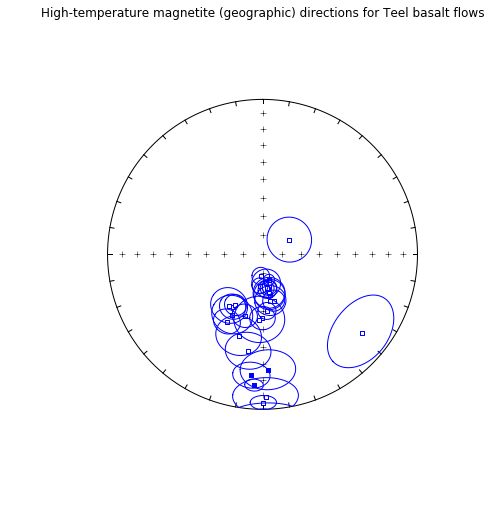

In [90]:
fignum = 1
plt.figure(num=fignum,figsize=(7,7))
ipmag.plot_net(1)
for n in range(len(teel_mag_means_geo)):
    ipmag.plot_di_mean(teel_mag_means_geo['dec_geo'][n],
                      teel_mag_means_geo['inc_geo'][n],
                      teel_mag_means_geo['alpha95'][n],
                      color='b',marker='s',label='')
plt.title('High-temperature magnetite (geographic) directions for Teel basalt flows')
plt.show()

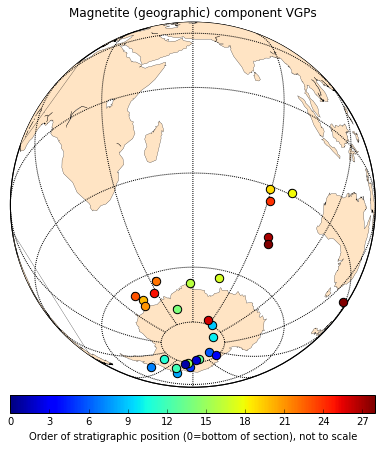

In [93]:
m = Basemap(projection='ortho',lat_0=-40,lon_0=60,resolution='c',area_thresh=50000)
plt.figure(figsize=(7, 7))
m.drawcoastlines(linewidth=0.25)
m.fillcontinents(color='bisque',lake_color='white',zorder=1)
m.drawmapboundary(fill_color='white')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))
m.readshapefile('./Code/reconstructed_0','Mongolia',linewidth=2,color='m')
#plot poles with colors according to stratigraphic order
for n in xrange (0, len(teel_mag_means_geo)):
     poles = ipmag.plot_pole_colorbar(m, teel_mag_means_geo['vgp_lon'][n],teel_mag_means_geo['vgp_lat'][n], 
                        1, 
                        teel_mag_means_geo['strat_pos'][n], 
                        0,
                        28, 
                        markersize=70, color="k", alpha=1)


plt.title('Magnetite (geographic) component VGPs')
m.colorbar(poles,location='bottom',label='Order of stratigraphic position (0=bottom of section), not to scale')
plt.show()

##### Tilt-corrected directions

In [95]:
# Convert mean direction dictionaries to dataframes
# TODO: figure out a way to iterate (or simplify) this code block, it's verbose...
#...Although, it processes very quickly!
Z30_mag = pd.DataFrame.from_dict({'Z30_mag':Z30_mag_tc_mean}, orient='index')
Z31_mag = pd.DataFrame.from_dict({'Z31_mag':Z31_mag_tc_mean}, orient='index')
Z32_mag = pd.DataFrame.from_dict({'Z32_mag':Z32_mag_tc_mean}, orient='index')
Z33_mag = pd.DataFrame.from_dict({'Z33_mag':Z33_mag_tc_mean}, orient='index')
Z34_mag = pd.DataFrame.from_dict({'Z34_mag':Z34_mag_tc_mean}, orient='index')
Z35_mag = pd.DataFrame.from_dict({'Z35_mag':Z35_mag_tc_mean}, orient='index')
Z36_mag = pd.DataFrame.from_dict({'Z36_mag':Z36_mag_tc_mean}, orient='index')
Z37_mag = pd.DataFrame.from_dict({'Z37_mag':Z37_mag_tc_mean}, orient='index')
Z38_mag = pd.DataFrame.from_dict({'Z38_mag':Z38_mag_tc_mean}, orient='index')
Z39_mag = pd.DataFrame.from_dict({'Z39_mag':Z39_mag_tc_mean}, orient='index')
Z40_mag = pd.DataFrame.from_dict({'Z40_mag':Z40_mag_tc_mean}, orient='index')
Z41_mag = pd.DataFrame.from_dict({'Z41_mag':Z41_mag_tc_mean}, orient='index')
Z42_mag = pd.DataFrame.from_dict({'Z42_mag':Z42_mag_tc_mean}, orient='index')
Z43_mag = pd.DataFrame.from_dict({'Z43_mag':Z43_mag_tc_mean}, orient='index')
Z44_mag = pd.DataFrame.from_dict({'Z44_mag':Z44_mag_tc_mean}, orient='index')
Z45_mag = pd.DataFrame.from_dict({'Z45_mag':Z45_mag_tc_mean}, orient='index')
Z46_mag = pd.DataFrame.from_dict({'Z46_mag':Z46_mag_tc_mean}, orient='index')
Z47_mag = pd.DataFrame.from_dict({'Z47_mag':Z47_mag_tc_mean}, orient='index')
Z48_mag = pd.DataFrame.from_dict({'Z48_mag':Z48_mag_tc_mean}, orient='index')
Z49_mag = pd.DataFrame.from_dict({'Z49_mag':Z49_mag_tc_mean}, orient='index')
Z50_mag = pd.DataFrame.from_dict({'Z50_mag':Z50_mag_tc_mean}, orient='index')
Z51_mag = pd.DataFrame.from_dict({'Z51_mag':Z51_mag_tc_mean}, orient='index')
Z52_mag = pd.DataFrame.from_dict({'Z52_mag':Z52_mag_tc_mean}, orient='index')
Z53_mag = pd.DataFrame.from_dict({'Z53_mag':Z53_mag_tc_mean}, orient='index')
Z54_mag = pd.DataFrame.from_dict({'Z54_mag':Z54_mag_tc_mean}, orient='index')
Z55_mag = pd.DataFrame.from_dict({'Z55_mag':Z55_mag_tc_mean}, orient='index')
Z56_mag = pd.DataFrame.from_dict({'Z56_mag':Z56_mag_tc_mean}, orient='index')
Z57_mag = pd.DataFrame.from_dict({'Z57_mag':Z57_mag_tc_mean}, orient='index')
Z58_mag = pd.DataFrame.from_dict({'Z58_mag':Z58_mag_tc_mean}, orient='index')
# combine all mean direction dataframes
teel_mag_means = Z30_mag
teel_mag_means = teel_mag_means.append(Z31_mag)
teel_mag_means = teel_mag_means.append(Z32_mag)
teel_mag_means = teel_mag_means.append(Z33_mag)
teel_mag_means = teel_mag_means.append(Z34_mag)
teel_mag_means = teel_mag_means.append(Z35_mag)
teel_mag_means = teel_mag_means.append(Z36_mag)
teel_mag_means = teel_mag_means.append(Z37_mag)
teel_mag_means = teel_mag_means.append(Z38_mag)
teel_mag_means = teel_mag_means.append(Z39_mag)
teel_mag_means = teel_mag_means.append(Z40_mag)
teel_mag_means = teel_mag_means.append(Z41_mag)
teel_mag_means = teel_mag_means.append(Z42_mag)
teel_mag_means = teel_mag_means.append(Z43_mag)
teel_mag_means = teel_mag_means.append(Z44_mag)
teel_mag_means = teel_mag_means.append(Z45_mag)
teel_mag_means = teel_mag_means.append(Z46_mag)
teel_mag_means = teel_mag_means.append(Z47_mag)
teel_mag_means = teel_mag_means.append(Z48_mag)
teel_mag_means = teel_mag_means.append(Z49_mag)
teel_mag_means = teel_mag_means.append(Z50_mag)
teel_mag_means = teel_mag_means.append(Z51_mag)
teel_mag_means = teel_mag_means.append(Z52_mag)
teel_mag_means = teel_mag_means.append(Z53_mag)
teel_mag_means = teel_mag_means.append(Z54_mag)
teel_mag_means = teel_mag_means.append(Z55_mag)
teel_mag_means = teel_mag_means.append(Z56_mag)
teel_mag_means = teel_mag_means.append(Z57_mag)
teel_mag_means = teel_mag_means.append(Z58_mag)
#rename dec/inc columns to show that they are tilt-corrected directions
teel_mag_means = teel_mag_means.rename(columns={'dec':'dec_tc'})
teel_mag_means = teel_mag_means.rename(columns={'inc':'inc_tc'})
#rearrange columns
teel_mag_means = teel_mag_means[['dec_tc','inc_tc','alpha95','n','k','r','csd']]
#insert site_lat/site_lon
teel_mag_means.insert(0,'site_lat',list(teel_2015_site_locs['site_lat']))
teel_mag_means.insert(1,'site_lon',list(teel_2015_site_locs['site_lon']))
teel_mag_means.insert(0,'strat_pos',list(teel_2015_site_locs['strat_pos']))
#calculate pole coordinates for mean directions
ipmag.vgp_calc(teel_mag_means)
teel_mag_means.to_csv('./Code/notebook_output/teel_mag_means')
teel_mag_means

,strat_pos,site_lat,site_lon,dec_tc,inc_tc,alpha95,n,k,r,csd,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
Z30_mag,4,47.10038,95.37550,278.379367,-46.010280,11.715664,7,27.500012,6.781818,15.446091,-27.381947,-14.408220,340.470733,14.408220,160.470733
Z31_mag,5,47.10049,95.37604,246.928001,-33.319165,3.753646,8,218.734693,7.967998,5.476791,-18.194560,-28.826591,9.314505,28.826591,189.314505
Z32_mag,6,47.10094,95.37684,234.132395,-32.854953,7.997970,9,42.396758,8.811306,12.439952,-17.895640,-37.203135,19.865666,37.203135,199.865666
Z33_mag,7,47.10107,95.37705,250.685156,-32.176114,4.581718,8,147.127336,7.952422,6.677876,-17.462312,-25.759713,7.086542,25.759713,187.086542
Z34_mag,8,47.10111,95.37712,247.131951,-35.840117,2.844796,10,289.334789,9.968894,4.761948,-19.856873,-29.843343,7.791244,29.843343,187.791244
Z35_mag,9,47.10069,95.37747,226.181747,-25.332749,6.399180,6,110.584559,5.954786,7.702608,-13.316749,-38.856026,31.001433,38.856026,211.001433
Z36_mag,11,47.10221,95.37959,247.531592,-39.317142,4.170654,8,177.361534,7.960533,6.082124,-22.268860,-31.221631,5.455763,31.221631,185.455763
Z37_mag,12,47.10211,95.37971,248.052322,-42.739898,7.478423,9,48.354733,8.834556,11.648380,-24.798438,-32.562210,2.867308,32.562210,182.867308
Z38_mag,13,47.09855,95.38445,237.351592,-42.681665,8.027422,10,37.175977,9.757908,13.284763,-24.753981,-39.808772,10.899760,39.808772,190.899760
Z39_mag,14,47.09860,95.38467,230.880551,-26.400672,6.363220,6,111.827254,5.955288,7.659690,-13.939647,-36.393048,26.087975,36.393048,206.087975


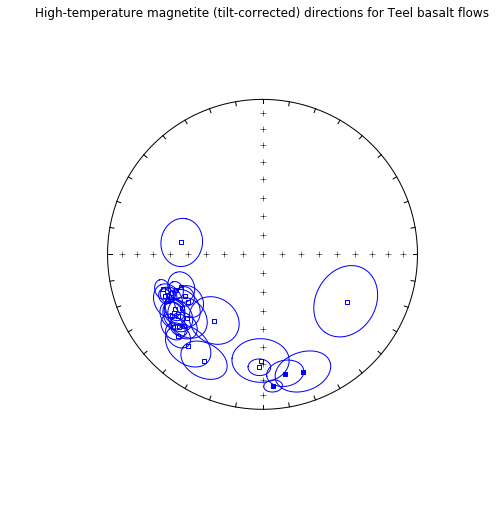

In [97]:
fignum = 1
plt.figure(num=fignum,figsize=(7,7))
ipmag.plot_net(1)
for n in range(len(teel_mag_means)):
    ipmag.plot_di_mean(teel_mag_means['dec_tc'][n],
                      teel_mag_means['inc_tc'][n],
                      teel_mag_means['alpha95'][n],
                      color='b',marker='s',label='')
plt.title('High-temperature magnetite (tilt-corrected) directions for Teel basalt flows')
plt.show()

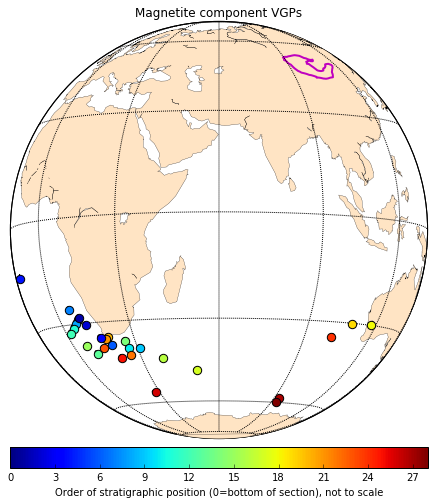

In [99]:
m = Basemap(projection='ortho',lat_0=-5,lon_0=60,resolution='c',area_thresh=50000)
plt.figure(figsize=(8, 8))
m.drawcoastlines(linewidth=0.25)
m.fillcontinents(color='bisque',lake_color='white',zorder=1)
m.drawmapboundary(fill_color='white')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))
m.readshapefile('./Code/reconstructed_0','Mongolia',linewidth=2,color='m')
#length of range (28 instead of 29) cuts off mag component of Z58 which is on the other hemisphere
for n in xrange (0, len(teel_mag_means)):
     poles = ipmag.plot_pole_colorbar(m, teel_mag_means['vgp_lon'][n],teel_mag_means['vgp_lat'][n], 
                        1, 
                        teel_mag_means['strat_pos'][n], 
                        0,
                        28, 
                        markersize=70, color="k", alpha=1)


plt.title('Magnetite component VGPs')
m.colorbar(poles,location='bottom',label='Order of stratigraphic position (0=bottom of section), not to scale')
plt.show()

#### Hematite directions

##### Geographic directions

In [101]:
# Convert mean direction dictionaries to dataframes
Z30_hem_geo = pd.DataFrame.from_dict({'Z30_hem_geo':Z30_hem_geo_mean}, orient='index')
Z35_hem_geo = pd.DataFrame.from_dict({'Z35_hem_geo':Z35_hem_geo_mean}, orient='index')
Z38_hem_geo = pd.DataFrame.from_dict({'Z38_hem_geo':Z38_hem_geo_mean}, orient='index')
Z39_hem_geo = pd.DataFrame.from_dict({'Z39_hem_geo':Z39_hem_geo_mean}, orient='index')
Z40_hem_geo = pd.DataFrame.from_dict({'Z40_hem_geo':Z40_hem_geo_mean}, orient='index')
Z41_hem_geo = pd.DataFrame.from_dict({'Z41_hem_geo':Z41_hem_geo_mean}, orient='index')
Z42_hem_geo = pd.DataFrame.from_dict({'Z42_hem_geo':Z42_hem_geo_mean}, orient='index')
Z43_hem_geo = pd.DataFrame.from_dict({'Z43_hem_geo':Z43_hem_geo_mean}, orient='index')
Z44_hem_geo = pd.DataFrame.from_dict({'Z44_hem_geo':Z44_hem_geo_mean}, orient='index')
Z45_hem_geo = pd.DataFrame.from_dict({'Z45_hem_geo':Z45_hem_geo_mean}, orient='index')
Z46_hem_geo = pd.DataFrame.from_dict({'Z46_hem_geo':Z46_hem_geo_mean}, orient='index')
Z47_hem_geo = pd.DataFrame.from_dict({'Z47_hem_geo':Z47_hem_geo_mean}, orient='index')
Z48_hem_geo = pd.DataFrame.from_dict({'Z48_hem_geo':Z48_hem_geo_mean}, orient='index')
Z49_hem_geo = pd.DataFrame.from_dict({'Z49_hem_geo':Z49_hem_geo_mean}, orient='index')
Z50_hem_geo = pd.DataFrame.from_dict({'Z50_hem_geo':Z50_hem_geo_mean}, orient='index')
Z51_hem_geo = pd.DataFrame.from_dict({'Z51_hem_geo':Z51_hem_geo_mean}, orient='index')
Z52_hem_geo = pd.DataFrame.from_dict({'Z52_hem_geo':Z52_hem_geo_mean}, orient='index')
Z53_hem_geo = pd.DataFrame.from_dict({'Z53_hem_geo':Z53_hem_geo_mean}, orient='index')
Z54_hem_geo = pd.DataFrame.from_dict({'Z54_hem_geo':Z54_hem_geo_mean}, orient='index')
Z56_hem_geo = pd.DataFrame.from_dict({'Z56_hem_geo':Z56_hem_geo_mean}, orient='index')
Z57_hem_geo = pd.DataFrame.from_dict({'Z57_hem_geo':Z57_hem_geo_mean}, orient='index')
# combine all mean direction dataframes
teel_hem_means_geo = Z35_hem_geo
teel_hem_means_geo = teel_hem_means_geo.append(Z30_hem_geo) #excluded b/c large a95
teel_hem_means_geo = teel_hem_means_geo.append(Z38_hem_geo)
teel_hem_means_geo = teel_hem_means_geo.append(Z39_hem_geo)
teel_hem_means_geo = teel_hem_means_geo.append(Z40_hem_geo)
teel_hem_means_geo = teel_hem_means_geo.append(Z41_hem_geo)
teel_hem_means_geo = teel_hem_means_geo.append(Z42_hem_geo)
teel_hem_means_geo = teel_hem_means_geo.append(Z43_hem_geo)
teel_hem_means_geo = teel_hem_means_geo.append(Z44_hem_geo)
teel_hem_means_geo = teel_hem_means_geo.append(Z45_hem_geo)
teel_hem_means_geo = teel_hem_means_geo.append(Z46_hem_geo) #excluded b/c large a95
teel_hem_means_geo = teel_hem_means_geo.append(Z47_hem_geo)
teel_hem_means_geo = teel_hem_means_geo.append(Z48_hem_geo)
teel_hem_means_geo = teel_hem_means_geo.append(Z49_hem_geo)
teel_hem_means_geo = teel_hem_means_geo.append(Z50_hem_geo)
teel_hem_means_geo = teel_hem_means_geo.append(Z51_hem_geo)
teel_hem_means_geo = teel_hem_means_geo.append(Z52_hem_geo)
teel_hem_means_geo = teel_hem_means_geo.append(Z53_hem_geo)
teel_hem_means_geo = teel_hem_means_geo.append(Z54_hem_geo) #excluded b/c large a95
teel_hem_means_geo = teel_hem_means_geo.append(Z56_hem_geo)
teel_hem_means_geo = teel_hem_means_geo.append(Z57_hem_geo)
#rename dec/inc columns, vgp_calc requires *_tc to be appended to dec/inc
#...this will be changed back for the final table (below)
teel_hem_means_geo = teel_hem_means_geo.rename(columns={'dec':'dec_tc'})
teel_hem_means_geo = teel_hem_means_geo.rename(columns={'inc':'inc_tc'})
#rearrange columns
teel_hem_means_geo = teel_hem_means_geo[['dec_tc','inc_tc','alpha95','n','k','r','csd']]
# not all sites have hematite comp - before adding site lat/long, delete rows
teel_locs_hem_edit = teel_2015_site_locs
teel_locs_hem_edit = teel_locs_hem_edit[teel_locs_hem_edit.er_site_name !='Z31']
teel_locs_hem_edit = teel_locs_hem_edit[teel_locs_hem_edit.er_site_name !='Z32']
teel_locs_hem_edit = teel_locs_hem_edit[teel_locs_hem_edit.er_site_name !='Z33']
teel_locs_hem_edit = teel_locs_hem_edit[teel_locs_hem_edit.er_site_name !='Z34']
teel_locs_hem_edit = teel_locs_hem_edit[teel_locs_hem_edit.er_site_name !='Z36']
teel_locs_hem_edit = teel_locs_hem_edit[teel_locs_hem_edit.er_site_name !='Z37']
teel_locs_hem_edit = teel_locs_hem_edit[teel_locs_hem_edit.er_site_name !='Z55']
teel_locs_hem_edit = teel_locs_hem_edit[teel_locs_hem_edit.er_site_name !='Z58']
#insert site_lat/site_lon
teel_hem_means_geo.insert(0,'site_lat',list(teel_locs_hem_edit['site_lat']))
teel_hem_means_geo.insert(1,'site_lon',list(teel_locs_hem_edit['site_lon']))
teel_hem_means_geo.insert(0,'strat_pos',list(teel_locs_hem_edit['strat_pos']))
#calculate pole coordinates for mean directions
ipmag.vgp_calc(teel_hem_means_geo)
teel_hem_means_geo = teel_hem_means_geo.rename(columns={'dec_tc':'dec_geo'})
teel_hem_means_geo = teel_hem_means_geo.rename(columns={'inc_tc':'inc_geo'})
teel_hem_means_geo.to_csv('./Code/notebook_output/teel_hem_means_geo')
teel_hem_means_geo

,strat_pos,site_lat,site_lon,dec_geo,inc_geo,alpha95,n,k,r,csd,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
Z35_hem_geo,4,47.10038,95.37550,185.352162,-5.560896,5.747798,6,136.842402,5.963462,6.924281,-2.787011,-45.444034,87.744611,45.444034,267.744611
Z30_hem_geo,9,47.10069,95.37747,148.799913,-68.209834,49.957167,7,2.413452,4.513935,52.139357,-51.356099,-69.351223,208.833918,69.351223,28.833918
Z38_hem_geo,13,47.09855,95.38445,195.565071,-26.364592,8.833229,2,801.477440,1.998752,2.861142,-13.918471,-54.362780,68.832083,54.362780,248.832083
Z39_hem_geo,14,47.09860,95.38467,196.313095,-15.623428,8.663295,5,78.962990,4.949343,9.115347,-7.959659,-48.458523,70.583219,48.458523,250.583219
Z40_hem_geo,15,47.09859,95.38474,189.173033,-23.507115,7.794855,7,60.926778,6.901521,10.377217,-12.269627,-54.326542,79.891757,54.326542,259.891757
Z41_hem_geo,10,47.10109,95.37744,178.834997,-26.225350,16.086290,5,23.576274,4.830338,16.681974,-13.836835,-56.721476,97.439300,56.721476,277.439300
Z42_hem_geo,16,47.09577,95.38577,165.448451,27.278167,16.388007,6,17.664613,5.716948,19.272274,14.457588,-27.077402,111.243174,27.077402,291.243174
Z43_hem_geo,17,47.09570,95.38638,182.753379,12.734651,6.220142,8,80.262873,7.912787,9.041233,6.446942,-36.401745,91.986451,36.401745,271.986451
Z44_hem_geo,18,47.09571,95.38651,182.138846,26.690156,2.023836,7,890.663468,6.993263,2.714115,14.109891,-28.764330,93.020083,28.764330,273.020083
Z45_hem_geo,19,47.09562,95.38676,179.431606,23.111384,4.657126,8,142.431974,7.950854,6.787053,12.045434,-30.856760,96.034300,30.856760,276.034300


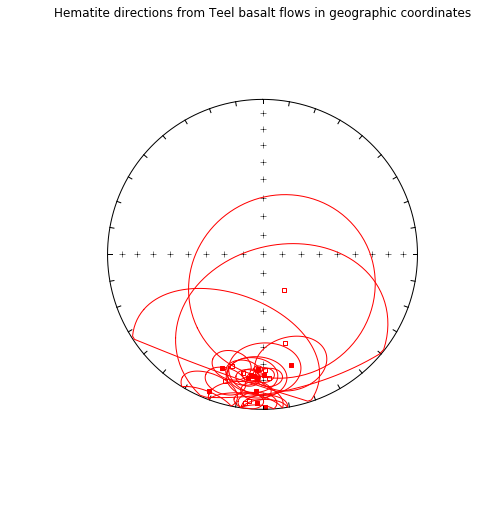

In [102]:
teel_hem_means_dib_geo = ipmag.make_di_block(list(teel_hem_means_geo['dec_geo']),list(teel_hem_means_geo['inc_geo']))
teel_hem_di_mean_geo = pmag.fisher_mean(teel_hem_means_dib_geo)
fignum = 1
plt.figure(num=fignum,figsize=(7,7))
ipmag.plot_net(1)
for n in range(len(teel_hem_means_geo)):
    ipmag.plot_di_mean(teel_hem_means_geo['dec_geo'][n],
                      teel_hem_means_geo['inc_geo'][n],
                      teel_hem_means_geo['alpha95'][n],
                      color='r',marker='s',label='')
plt.title('Hematite directions from Teel basalt flows in geographic coordinates')
plt.show()

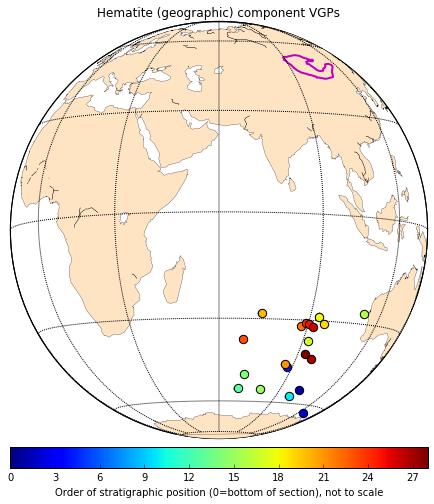

In [104]:
m = Basemap(projection='ortho',lat_0=-5,lon_0=60,resolution='c',area_thresh=50000)
plt.figure(figsize=(8, 8))
m.drawcoastlines(linewidth=0.25)
m.fillcontinents(color='bisque',lake_color='white',zorder=1)
m.drawmapboundary(fill_color='white')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))
m.readshapefile('./Code/reconstructed_0','Mongolia',linewidth=2,color='m')

for n in xrange (0, len(teel_hem_means_geo)):
     poles = ipmag.plot_pole_colorbar(m, teel_hem_means_geo['vgp_lon'][n],teel_hem_means_geo['vgp_lat'][n], 
                        1, 
                        teel_hem_means_geo['strat_pos'][n], 
                        0,
                        28, 
                        markersize=70, color="k", alpha=1)


plt.title('Hematite (geographic) component VGPs')
m.colorbar(poles,location='bottom',label='Order of stratigraphic position (0=bottom of section), not to scale')
plt.show()

##### Tilt-corrected directions

In [106]:
# Convert mean direction dictionaries to dataframes
Z30_hem = pd.DataFrame.from_dict({'Z30_hem':Z30_hem_tc_mean}, orient='index')
Z35_hem = pd.DataFrame.from_dict({'Z35_hem':Z35_hem_tc_mean}, orient='index')
Z38_hem = pd.DataFrame.from_dict({'Z38_hem':Z38_hem_tc_mean}, orient='index')
Z39_hem = pd.DataFrame.from_dict({'Z39_hem':Z39_hem_tc_mean}, orient='index')
Z40_hem = pd.DataFrame.from_dict({'Z40_hem':Z40_hem_tc_mean}, orient='index')
Z41_hem = pd.DataFrame.from_dict({'Z41_hem':Z41_hem_tc_mean}, orient='index')
Z42_hem = pd.DataFrame.from_dict({'Z42_hem':Z42_hem_tc_mean}, orient='index')
Z43_hem = pd.DataFrame.from_dict({'Z43_hem':Z43_hem_tc_mean}, orient='index')
Z44_hem = pd.DataFrame.from_dict({'Z44_hem':Z44_hem_tc_mean}, orient='index')
Z45_hem = pd.DataFrame.from_dict({'Z45_hem':Z45_hem_tc_mean}, orient='index')
Z46_hem = pd.DataFrame.from_dict({'Z46_hem':Z46_hem_tc_mean}, orient='index')
Z47_hem = pd.DataFrame.from_dict({'Z47_hem':Z47_hem_tc_mean}, orient='index')
Z48_hem = pd.DataFrame.from_dict({'Z48_hem':Z48_hem_tc_mean}, orient='index')
Z49_hem = pd.DataFrame.from_dict({'Z49_hem':Z49_hem_tc_mean}, orient='index')
Z50_hem = pd.DataFrame.from_dict({'Z50_hem':Z50_hem_tc_mean}, orient='index')
Z51_hem = pd.DataFrame.from_dict({'Z51_hem':Z51_hem_tc_mean}, orient='index')
Z52_hem = pd.DataFrame.from_dict({'Z52_hem':Z52_hem_tc_mean}, orient='index')
Z53_hem = pd.DataFrame.from_dict({'Z53_hem':Z53_hem_tc_mean}, orient='index')
Z54_hem = pd.DataFrame.from_dict({'Z54_hem':Z54_hem_tc_mean}, orient='index')
Z56_hem = pd.DataFrame.from_dict({'Z56_hem':Z56_hem_tc_mean}, orient='index')
Z57_hem = pd.DataFrame.from_dict({'Z57_hem':Z57_hem_tc_mean}, orient='index')
# combine all mean direction dataframes
teel_hem_means = Z35_hem
teel_hem_means = teel_hem_means.append(Z30_hem) #excluded b/c large a95
teel_hem_means = teel_hem_means.append(Z38_hem)
teel_hem_means = teel_hem_means.append(Z39_hem)
teel_hem_means = teel_hem_means.append(Z40_hem)
teel_hem_means = teel_hem_means.append(Z41_hem)
teel_hem_means = teel_hem_means.append(Z42_hem)
teel_hem_means = teel_hem_means.append(Z43_hem)
teel_hem_means = teel_hem_means.append(Z44_hem)
teel_hem_means = teel_hem_means.append(Z45_hem)
teel_hem_means = teel_hem_means.append(Z46_hem) #excluded b/c large a95
teel_hem_means = teel_hem_means.append(Z47_hem)
teel_hem_means = teel_hem_means.append(Z48_hem)
teel_hem_means = teel_hem_means.append(Z49_hem)
teel_hem_means = teel_hem_means.append(Z50_hem)
teel_hem_means = teel_hem_means.append(Z51_hem)
teel_hem_means = teel_hem_means.append(Z52_hem)
teel_hem_means = teel_hem_means.append(Z53_hem)
teel_hem_means = teel_hem_means.append(Z54_hem) #excluded b/c large a95
teel_hem_means = teel_hem_means.append(Z56_hem)
teel_hem_means = teel_hem_means.append(Z57_hem)
#rename dec/inc columns to show that they are tilt-corrected directions
teel_hem_means = teel_hem_means.rename(columns={'dec':'dec_tc'})
teel_hem_means = teel_hem_means.rename(columns={'inc':'inc_tc'})
#rearrange columns
teel_hem_means = teel_hem_means[['dec_tc','inc_tc','alpha95','n','k','r','csd']]
# not all sites have hematite comp - before adding site lat/long, delete rows
teel_locs_hem_edit = teel_2015_site_locs
teel_locs_hem_edit = teel_locs_hem_edit[teel_locs_hem_edit.er_site_name !='Z31']
teel_locs_hem_edit = teel_locs_hem_edit[teel_locs_hem_edit.er_site_name !='Z32']
teel_locs_hem_edit = teel_locs_hem_edit[teel_locs_hem_edit.er_site_name !='Z33']
teel_locs_hem_edit = teel_locs_hem_edit[teel_locs_hem_edit.er_site_name !='Z34']
teel_locs_hem_edit = teel_locs_hem_edit[teel_locs_hem_edit.er_site_name !='Z36']
teel_locs_hem_edit = teel_locs_hem_edit[teel_locs_hem_edit.er_site_name !='Z37']
teel_locs_hem_edit = teel_locs_hem_edit[teel_locs_hem_edit.er_site_name !='Z55']
teel_locs_hem_edit = teel_locs_hem_edit[teel_locs_hem_edit.er_site_name !='Z58']

#insert site_lat/site_lon
teel_hem_means.insert(0,'site_lat',list(teel_locs_hem_edit['site_lat']))
teel_hem_means.insert(1,'site_lon',list(teel_locs_hem_edit['site_lon']))
teel_hem_means.insert(0,'strat_pos',list(teel_locs_hem_edit['strat_pos']))
#calculate pole coordinates for mean directions
ipmag.vgp_calc(teel_hem_means)
teel_hem_means.to_csv('./Code/notebook_output/teel_hem_means')
teel_hem_means

,strat_pos,site_lat,site_lon,dec_tc,inc_tc,alpha95,n,k,r,csd,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
Z35_hem,4,47.10038,95.37550,185.114311,6.025809,5.727598,6,137.802632,5.963716,6.900114,3.021259,-39.676603,88.733786,39.676603,268.733786
Z30_hem,9,47.10069,95.37747,242.928054,-40.237690,49.931876,7,2.414928,4.515454,52.123423,-22.933069,-34.802858,8.295178,34.802858,188.295178
Z38_hem,13,47.09855,95.38445,208.352571,-5.900502,8.908547,2,788.017587,1.998731,2.885473,-2.958094,-39.500385,57.459211,39.500385,237.459211
Z39_hem,14,47.09860,95.38467,201.539571,2.413034,8.658960,5,79.041121,4.949393,9.110841,1.207052,-38.143076,67.563030,38.143076,247.563030
Z40_hem,15,47.09859,95.38474,202.157748,-7.928196,7.788149,7,61.030111,6.901688,10.368429,-3.983165,-42.830083,64.518459,42.830083,244.518459
Z41_hem,10,47.10109,95.37744,198.411151,-11.058439,16.113432,5,23.500114,4.829788,16.708984,-5.581195,-45.565273,68.698517,45.565273,248.698517
Z42_hem,16,47.09577,95.38577,151.386122,14.995751,16.374487,6,17.692229,5.717390,19.257227,7.628503,-29.676516,128.501026,29.676516,308.501026
Z43_hem,17,47.09570,95.38638,173.787706,13.587096,6.227989,8,80.063147,7.912569,9.052503,6.890414,-35.733259,102.991555,35.733259,282.991555
Z44_hem,18,47.09571,95.38651,163.946455,23.981346,2.033549,7,882.184819,6.993199,2.727126,12.539568,-28.658505,113.302682,28.658505,293.302682
Z45_hem,19,47.09562,95.38676,164.416633,19.689336,4.665334,8,141.934618,7.950682,6.798934,10.144077,-31.097230,113.374942,31.097230,293.374942


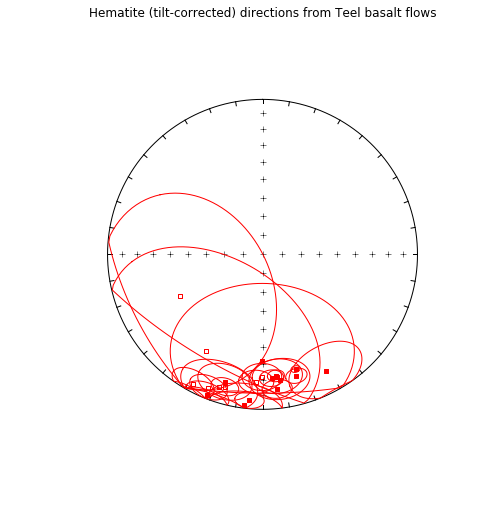

In [107]:
teel_hem_means_dib_tc = ipmag.make_di_block(list(teel_hem_means['dec_tc']),list(teel_hem_means['inc_tc']))
teel_hem_di_mean_tc = pmag.fisher_mean(teel_hem_means_dib_tc)

fignum = 1
plt.figure(num=fignum,figsize=(7,7))
ipmag.plot_net(1)
for n in range(len(teel_hem_means)):
    ipmag.plot_di_mean(teel_hem_means['dec_tc'][n],
                      teel_hem_means['inc_tc'][n],
                      teel_hem_means['alpha95'][n],
                      color='r',marker='s',label='')
plt.title('Hematite (tilt-corrected) directions from Teel basalt flows')
plt.show()

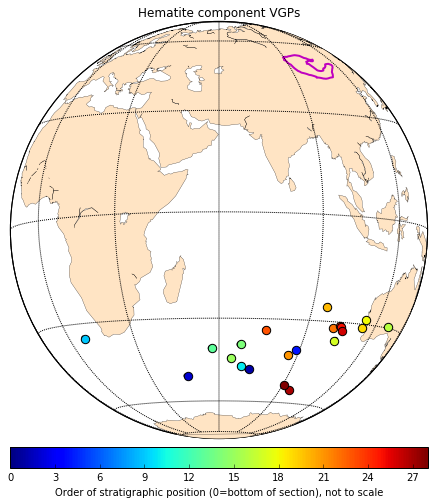

In [109]:
m = Basemap(projection='ortho',lat_0=-5,lon_0=60,resolution='c',area_thresh=50000)
plt.figure(figsize=(8, 8))
m.drawcoastlines(linewidth=0.25)
m.fillcontinents(color='bisque',lake_color='white',zorder=1)
m.drawmapboundary(fill_color='white')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))
m.readshapefile('./Code/reconstructed_0','Mongolia',linewidth=2,color='m')

for n in xrange (0, len(teel_hem_means)):
     poles = ipmag.plot_pole_colorbar(m, teel_hem_means['vgp_lon'][n],teel_hem_means['vgp_lat'][n], 
                        1, 
                        teel_hem_means['strat_pos'][n], 
                        0,
                        28, 
                        markersize=70, color="k", alpha=1)


plt.title('Hematite component VGPs')
m.colorbar(poles,location='bottom',label='Order of stratigraphic position (0=bottom of section), not to scale')
plt.show()

#### Mid-temperature directions

In [110]:
# Convert mean direction dictionaries to dataframes
# TODO: figure out a way to iterate (or simplify) this code block, it's verbose...
#...Although, it processes very quickly!
Z42_mid = pd.DataFrame.from_dict({'Z42_mid':Z42_mid_geo_mean}, orient='index')
Z43_mid = pd.DataFrame.from_dict({'Z43_mid':Z43_mid_geo_mean}, orient='index')
Z58_mid = pd.DataFrame.from_dict({'Z58_mid':Z58_mid_geo_mean}, orient='index')
# combine all mean direction dataframes
teel_mid_means = Z42_mid
teel_mid_means = teel_mid_means.append(Z43_mid)
teel_mid_means = teel_mid_means.append(Z58_mid)
#rename dec/inc columns to show that they are tilt-corrected directions
teel_mid_means = teel_mid_means.rename(columns={'dec':'dec_tc'})
teel_mid_means = teel_mid_means.rename(columns={'inc':'inc_tc'})
#rearrange columns
teel_mid_means = teel_mid_means[['dec_tc','inc_tc','alpha95','n','k','r','csd']]
# not all sites have mid-temp comp - before adding site lat/long, delete rows
teel_locs_mid_edit = teel_2015_site_locs.ix[[12,13,28]]
#insert site_lat/site_lon
teel_mid_means.insert(0,'site_lat',list(teel_locs_mid_edit['site_lat']))
teel_mid_means.insert(1,'site_lon',list(teel_locs_mid_edit['site_lon']))
teel_mid_means.insert(0,'strat_pos',list(teel_locs_mid_edit['strat_pos']))
#calculate pole coordinates for mean directions
ipmag.vgp_calc(teel_mid_means)
teel_mid_means = teel_mid_means.rename(columns={'dec_tc':'dec_geo'})
teel_mid_means = teel_mid_means.rename(columns={'inc_tc':'inc_geo'})
teel_mid_means

,strat_pos,site_lat,site_lon,dec_geo,inc_geo,alpha95,n,k,r,csd,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
Z42_mid,16,47.09577,95.38577,332.936127,-68.973663,22.704625,4,17.342624,3.827016,19.450359,-52.447527,-12.194273,291.867415,12.194273,111.867415
Z43_mid,17,47.09570,95.38638,214.749151,-62.316153,27.256978,4,12.329873,3.756688,23.067776,-43.621783,-65.542782,0.679322,65.542782,180.679322
Z58_mid,29,47.06277,95.42045,169.686782,-61.093602,4.004771,6,280.878503,5.982199,4.833100,-42.161138,-81.183719,155.401297,81.183719,335.401297


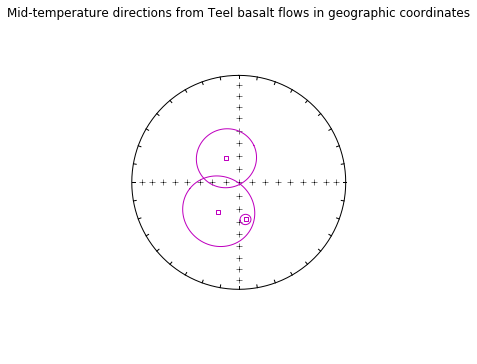

In [111]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(1)
for n in range(len(teel_mid_means)):
    ipmag.plot_di_mean(teel_mid_means['dec_geo'][n],
                      teel_mid_means['inc_geo'][n],
                      teel_mid_means['alpha95'][n],
                      color='m',marker='s',label='')
plt.title('Mid-temperature directions from Teel basalt flows in geographic coordinates')
plt.show()

Flow Z58 yielded a completely different mid-temperature result compared to all other sites. The magnetite direction is completely different than all other results. The mean direction is very imprecise (SE and moderately-shallow down) but is closest in orientation to the Middle to Late Carboniferous 'A' component of Edel et al. (2014).

### Paleomagnetic Poles for the Teel Formation

We beleive that the primary paleomagnetic pole for the Teel basalts is held by magnetite in some form (i.e., magnetite with slightly different amounts of titanium). However, demagnetization data from some sites show similarities to the remanence directions of magnetite and hematite. We suspect that the hematite directions were acquired later in the Paleozoic Era, therefore when the magnetite remanence is similar to that of hematite we suspect that the magnetite has been chemically overprinted by dominant amounts of hematite. 

#### Primary magnetite pole - including fold test

All of these mean directions are derived from unblocking temperatures in the magnetite range. However, we beleive that a number of sites yield samples where the hematite remanence demagnetizes at the same time as magnetite, therefore preventing a measurement of the pure magnetite magnetization. When this behavior is suspected or evident in samples or sites, those results are documented and excluded.

In [112]:
# A number of poles are excluded because of their similarity to the hematite components...
# ...suggesting a broad overlap in the unblockin spectra of hematite into the magnetite range
teel_mag_means_edit,teel_mag_means_geo_edit=[],[]
teel_prim_mag_vgps = teel_mag_means #tilt-corrected exclusions
#teel_prim_mag_vgps = teel_prim_mag_vgps[teel_prim_mag_vgps.index !='Z30_mag']
#teel_prim_mag_vgps = teel_prim_mag_vgps[teel_prim_mag_vgps.index !='Z43_mag']
teel_prim_mag_vgps = teel_prim_mag_vgps[teel_prim_mag_vgps.index !='Z44_mag']
teel_prim_mag_vgps = teel_prim_mag_vgps[teel_prim_mag_vgps.index !='Z45_mag']
teel_prim_mag_vgps = teel_prim_mag_vgps[teel_prim_mag_vgps.index !='Z50_mag']
#teel_prim_mag_vgps = teel_prim_mag_vgps[teel_prim_mag_vgps.index !='Z52_mag']
teel_prim_mag_vgps = teel_prim_mag_vgps[teel_prim_mag_vgps.index !='Z56_mag']
teel_prim_mag_vgps = teel_prim_mag_vgps[teel_prim_mag_vgps.index !='Z57_mag']
teel_prim_mag_vgps = teel_prim_mag_vgps[teel_prim_mag_vgps.index !='Z58_mag']
teel_mag_means_edit = teel_mag_means#also eliminated same sites from dec/incs
#teel_mag_means_edit = teel_mag_means_edit.drop('Z30_mag')
#teel_mag_means_edit = teel_mag_means_edit.drop('Z43_mag')
teel_mag_means_edit = teel_mag_means_edit.drop('Z44_mag')
teel_mag_means_edit = teel_mag_means_edit.drop('Z45_mag')
teel_mag_means_edit = teel_mag_means_edit.drop('Z50_mag')
#teel_mag_means_edit = teel_mag_means_edit.drop('Z52_mag')
teel_mag_means_edit = teel_mag_means_edit.drop('Z56_mag')
teel_mag_means_edit = teel_mag_means_edit.drop('Z57_mag')
teel_mag_means_edit = teel_mag_means_edit.drop('Z58_mag')
teel_prim_mag_geo_vgps = teel_mag_means_geo #geographic exclusions (same as TC dirs)
#teel_prim_mag_geo_vgps = teel_prim_mag_geo_vgps[teel_prim_mag_geo_vgps.index !='Z30_mag_geo']
#teel_prim_mag_geo_vgps = teel_prim_mag_geo_vgps[teel_prim_mag_geo_vgps.index !='Z43_mag_geo']
teel_prim_mag_geo_vgps = teel_prim_mag_geo_vgps[teel_prim_mag_geo_vgps.index !='Z44_mag_geo']
teel_prim_mag_geo_vgps = teel_prim_mag_geo_vgps[teel_prim_mag_geo_vgps.index !='Z45_mag_geo']
teel_prim_mag_geo_vgps = teel_prim_mag_geo_vgps[teel_prim_mag_geo_vgps.index !='Z50_mag_geo']
#teel_prim_mag_geo_vgps = teel_prim_mag_geo_vgps[teel_prim_mag_geo_vgps.index !='Z52_mag_geo']
teel_prim_mag_geo_vgps = teel_prim_mag_geo_vgps[teel_prim_mag_geo_vgps.index !='Z56_mag_geo']
teel_prim_mag_geo_vgps = teel_prim_mag_geo_vgps[teel_prim_mag_geo_vgps.index !='Z57_mag_geo']
teel_prim_mag_geo_vgps = teel_prim_mag_geo_vgps[teel_prim_mag_geo_vgps.index !='Z58_mag_geo']
teel_mag_means_geo_edit = teel_mag_means_geo
#teel_mag_means_geo_edit = teel_mag_means_geo_edit.drop('Z30_mag_geo')
#teel_mag_means_geo_edit = teel_mag_means_geo_edit.drop('Z43_mag_geo')
teel_mag_means_geo_edit = teel_mag_means_geo_edit.drop('Z44_mag_geo')#also eliminated same sites from dec/incs
teel_mag_means_geo_edit = teel_mag_means_geo_edit.drop('Z45_mag_geo')
teel_mag_means_geo_edit = teel_mag_means_geo_edit.drop('Z50_mag_geo')
#teel_mag_means_geo_edit = teel_mag_means_geo_edit.drop('Z52_mag_geo')
teel_mag_means_geo_edit = teel_mag_means_geo_edit.drop('Z56_mag_geo')
teel_mag_means_geo_edit = teel_mag_means_geo_edit.drop('Z57_mag_geo')
teel_mag_means_geo_edit = teel_mag_means_geo_edit.drop('Z58_mag_geo')
teel_site_bedding_edit = teel_site_bedding #also eliminate same sites from bedding orient. table
#teel_site_bedding_edit = teel_site_bedding_edit[teel_site_bedding_edit.index !='Z30']
#teel_site_bedding_edit = teel_site_bedding_edit[teel_site_bedding_edit.index !='Z43']
teel_site_bedding_edit = teel_site_bedding_edit[teel_site_bedding_edit.index !='Z44']
teel_site_bedding_edit = teel_site_bedding_edit[teel_site_bedding_edit.index !='Z45']
teel_site_bedding_edit = teel_site_bedding_edit[teel_site_bedding_edit.index !='Z50']
#teel_site_bedding_edit = teel_site_bedding_edit[teel_site_bedding_edit.index !='Z52']
teel_site_bedding_edit = teel_site_bedding_edit[teel_site_bedding_edit.index !='Z56']
teel_site_bedding_edit = teel_site_bedding_edit[teel_site_bedding_edit.index !='Z57']
teel_site_bedding_edit = teel_site_bedding_edit[teel_site_bedding_edit.index !='Z58']

In [113]:
#calculate means from edited list
teel_mag_means_dib_geo = ipmag.make_di_block(list(teel_mag_means_geo_edit['dec_geo']),list(teel_mag_means_geo_edit['inc_geo']))
teel_mag_di_mean_geo = pmag.fisher_mean(teel_mag_means_dib_geo)
teel_mag_means_dib = ipmag.make_di_block(list(teel_mag_means_edit['dec_tc']),list(teel_mag_means_edit['inc_tc']))
teel_mag_di_mean = pmag.fisher_mean(teel_mag_means_dib)

In [114]:
teel_mag_di_mean

{'alpha95': 4.9431252055096131,
 'csd': 13.058928417331206,
 'dec': 236.6128693429381,
 'inc': -34.995940978983391,
 'k': 38.472902790170508,
 'n': 23,
 'r': 22.428168960372265}

In [115]:
teel_mag_di_mean_geo

{'alpha95': 5.7116821039230583,
 'csd': 15.025346173655382,
 'dec': 186.62753154703333,
 'inc': -64.852074989296611,
 'k': 29.061703291478157,
 'n': 23,
 'r': 22.24299000029874}

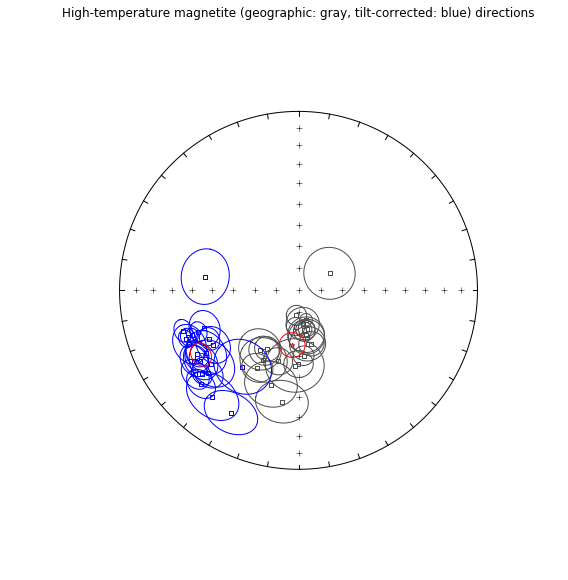

In [117]:
fignum = 1
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(1)
for n in range(len(teel_mag_means_geo_edit)):
    ipmag.plot_di_mean(teel_mag_means_edit['dec_tc'][n],
                      teel_mag_means_edit['inc_tc'][n],
                      teel_mag_means_edit['alpha95'][n],
                      color='b',marker='s',label='')
    ipmag.plot_di_mean(teel_mag_means_geo_edit['dec_geo'][n],
                      teel_mag_means_geo_edit['inc_geo'][n],
                      teel_mag_means_geo_edit['alpha95'][n],
                      color='0.3',marker='s',label='')
ipmag.plot_di_mean(teel_mag_di_mean['dec'],
                      teel_mag_di_mean['inc'],
                      teel_mag_di_mean['alpha95'],
                      color='r',marker='s')
ipmag.plot_di_mean(teel_mag_di_mean_geo['dec'],
                      teel_mag_di_mean_geo['inc'],
                      teel_mag_di_mean_geo['alpha95'],
                      color='r',marker='*')
plt.title('High-temperature magnetite (geographic: gray, tilt-corrected: blue) directions')
plt.savefig('./Code/notebook_output/Mag_fold_test.pdf')
plt.show()

###### Bootstrap fold test (Tauxe and Watson, 1994)

doing  1000  iterations...please be patient.....


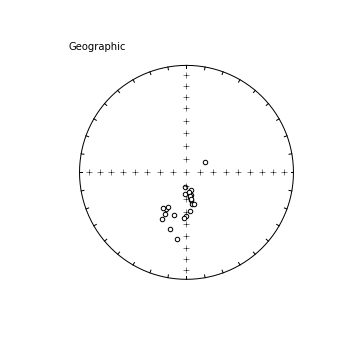

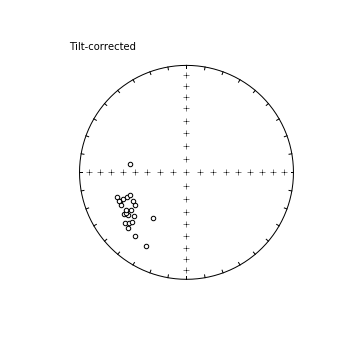


tightest grouping of vectors obtained at (95% confidence bounds):
52 - 97 percent unfolding
range of all bootstrap samples: 
25  -  104 percent unfolding


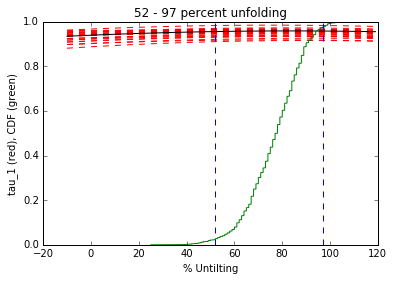

In [118]:
mag_boot_list =[]
for i in range(len(teel_prim_mag_geo_vgps)):
    dec_g,inc_g,dip_dir,dip=teel_prim_mag_geo_vgps['dec_geo'][i],teel_prim_mag_geo_vgps['inc_geo'][i],teel_site_bedding_edit['sample_bed_dip_direction'][i],teel_site_bedding_edit['sample_bed_dip'][i]
    mag_boot_list.append([dec_g,inc_g,dip_dir,dip])
mag_boot_data = np.array(mag_boot_list)
#save bootstrap file for command line fold test figure output
np.savetxt('./Code/notebook_output/mag_boot_data.txt',mag_boot_data,fmt='%.2f',delimiter=' ')
ipmag.bootstrap_fold_test(mag_boot_data,num_sims=1000,min_untilt=-10,max_untilt=120)

Below the tilt-corrected magnetite VGPs are plotted on the globe and shaded according to their relative stratigraphic positions.

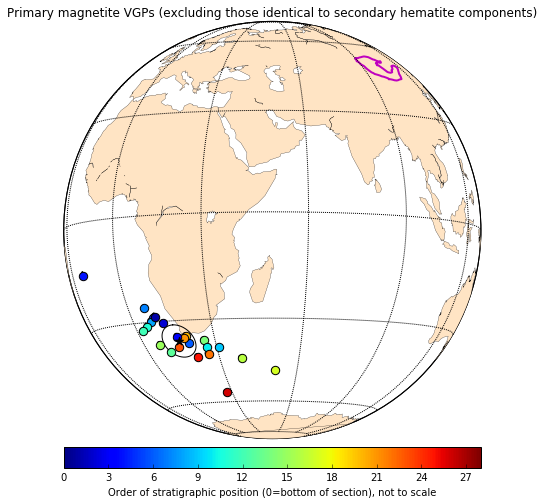

In [120]:
teel_prim_mag_vgps_dir = ipmag.make_di_block(teel_prim_mag_vgps['vgp_lon'],teel_prim_mag_vgps['vgp_lat'])
teel_prim_mag_pole = pmag.fisher_mean(teel_prim_mag_vgps_dir)

m = Basemap(projection='ortho',lat_0=-5,lon_0=50,resolution='c',area_thresh=50000)
plt.figure(figsize=(8, 8))
m.drawcoastlines(linewidth=0.25)
m.fillcontinents(color='bisque',lake_color='white',zorder=1)
m.drawmapboundary(fill_color='white')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))
m.readshapefile('./Code/reconstructed_0','Mongolia',linewidth=2,color='m')

for n in xrange (0, len(teel_prim_mag_vgps)):
     poles = ipmag.plot_pole_colorbar(m, teel_prim_mag_vgps['vgp_lon'][n],teel_prim_mag_vgps['vgp_lat'][n], 
                        1, 
                        teel_prim_mag_vgps['strat_pos'][n], 
                        0,
                        28, 
                        markersize=70, color="k", alpha=1)

plt.title('Primary magnetite VGPs (excluding those identical to secondary hematite components)')
m.colorbar(poles,location='bottom',label='Order of stratigraphic position (0=bottom of section), not to scale')
ipmag.plot_pole(m,teel_prim_mag_pole['dec'],teel_prim_mag_pole['inc'],teel_prim_mag_pole['alpha95'],marker='*',markersize=70)
#plt.savefig('./notebook_output/...')
plt.show()

#### Secondary hematite pole - including fold test

In [122]:
# A number of poles are excluded because of their similarity to the hematite components...
# ...suggesting a broad overlap in the unblocking spectra of hematite into the magnetite range
teel_hem_means_edit,teel_hem_means_geo_edit=[],[]
teel_sec_hem_vgps = teel_hem_means#tilt-corrected exclusions
teel_sec_hem_vgps = teel_sec_hem_vgps[teel_sec_hem_vgps.index !='Z30_hem']
teel_sec_hem_vgps = teel_sec_hem_vgps[teel_sec_hem_vgps.index !='Z46_hem']
teel_sec_hem_vgps = teel_sec_hem_vgps[teel_sec_hem_vgps.index !='Z54_hem']
teel_hem_means_edit = teel_hem_means#also eliminated same sites from dec/incs
teel_hem_means_edit = teel_hem_means_edit.drop('Z30_hem')
teel_hem_means_edit = teel_hem_means_edit.drop('Z46_hem')
teel_hem_means_edit = teel_hem_means_edit.drop('Z54_hem')
teel_sec_hem_geo_vgps = teel_hem_means_geo#geographic exclusions (same as TC dirs)
teel_sec_hem_geo_vgps = teel_sec_hem_geo_vgps[teel_sec_hem_geo_vgps.index !='Z30_hem_geo']
teel_sec_hem_geo_vgps = teel_sec_hem_geo_vgps[teel_sec_hem_geo_vgps.index !='Z46_hem_geo']
teel_sec_hem_geo_vgps = teel_sec_hem_geo_vgps[teel_sec_hem_geo_vgps.index !='Z54_hem_geo']
teel_hem_means_geo_edit = teel_hem_means_geo
teel_hem_means_geo_edit = teel_hem_means_geo_edit.drop('Z30_hem_geo')#also eliminated same sites from dec/incs
teel_hem_means_geo_edit = teel_hem_means_geo_edit.drop('Z46_hem_geo')
teel_hem_means_geo_edit = teel_hem_means_geo_edit.drop('Z54_hem_geo')
teel_site_bedding_hedit = teel_site_bedding #also eliminate same sites from bedding orient. table
teel_site_bedding_hedit = teel_site_bedding_hedit[teel_site_bedding_hedit.index !='Z30']
teel_site_bedding_hedit = teel_site_bedding_hedit[teel_site_bedding_hedit.index !='Z31']
teel_site_bedding_hedit = teel_site_bedding_hedit[teel_site_bedding_hedit.index !='Z32']
teel_site_bedding_hedit = teel_site_bedding_hedit[teel_site_bedding_hedit.index !='Z33']
teel_site_bedding_hedit = teel_site_bedding_hedit[teel_site_bedding_hedit.index !='Z34']
teel_site_bedding_hedit = teel_site_bedding_hedit[teel_site_bedding_hedit.index !='Z36']
teel_site_bedding_hedit = teel_site_bedding_hedit[teel_site_bedding_hedit.index !='Z37']
teel_site_bedding_hedit = teel_site_bedding_hedit[teel_site_bedding_hedit.index !='Z46']
teel_site_bedding_hedit = teel_site_bedding_hedit[teel_site_bedding_hedit.index !='Z54']
teel_site_bedding_hedit = teel_site_bedding_hedit[teel_site_bedding_hedit.index !='Z55']
teel_site_bedding_hedit = teel_site_bedding_hedit[teel_site_bedding_hedit.index !='Z58']

In [123]:
#calculate means from edited list
teel_hem_means_dib_geo = ipmag.make_di_block(list(teel_hem_means_geo_edit['dec_geo']),list(teel_hem_means_geo_edit['inc_geo']))
teel_hem_di_mean_geo = pmag.fisher_mean(teel_hem_means_dib_geo)
teel_hem_means_dib = ipmag.make_di_block(list(teel_hem_means_edit['dec_tc']),list(teel_hem_means_edit['inc_tc']))
teel_hem_di_mean = pmag.fisher_mean(teel_hem_means_dib)

In [124]:
teel_hem_di_mean_geo

{'alpha95': 9.2608689622177227,
 'csd': 20.97901071644646,
 'dec': 184.58560616364625,
 'inc': 3.8459585385145614,
 'k': 14.907335584818336,
 'n': 18,
 'r': 16.85962183494998}

In [125]:
teel_hem_di_mean

{'alpha95': 9.4955663885263011,
 'csd': 21.474669531178204,
 'dec': 182.89089648457883,
 'inc': 6.1094491428847837,
 'k': 14.227122114351561,
 'n': 18,
 'r': 16.805099171613119}

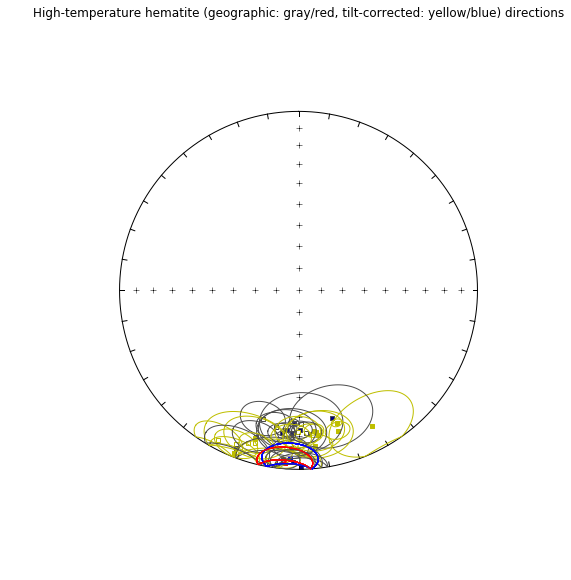

In [131]:
fignum = 1
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(1)
for n in range(len(teel_hem_means_geo_edit)):
    ipmag.plot_di_mean(teel_hem_means_edit['dec_tc'][n],
                      teel_hem_means_edit['inc_tc'][n],
                      teel_hem_means_edit['alpha95'][n],
                      color='y',marker='s',label='')
    ipmag.plot_di_mean(teel_hem_means_geo_edit['dec_geo'][n],
                      teel_hem_means_geo_edit['inc_geo'][n],
                      teel_hem_means_geo_edit['alpha95'][n],
                      color='0.3',marker='s',label='')
    ipmag.plot_di_mean(teel_hem_di_mean['dec'],
                      teel_hem_di_mean['inc'],
                      teel_hem_di_mean['alpha95'],
                      color='b',marker='s')
    ipmag.plot_di_mean(teel_hem_di_mean_geo['dec'],
                      teel_hem_di_mean_geo['inc'],
                      teel_hem_di_mean_geo['alpha95'],
                      color='r',marker='*')
plt.title('High-temperature hematite (geographic: gray/red, tilt-corrected: yellow/blue) directions')
plt.savefig('./Code/notebook_output/hematite_fold_test.pdf')
plt.show()

###### Bootstrap fold test (Tauxe and Watson, 1994)

doing  1000  iterations...please be patient.....


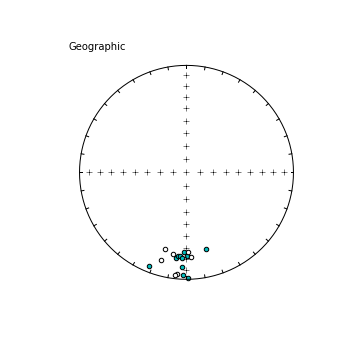

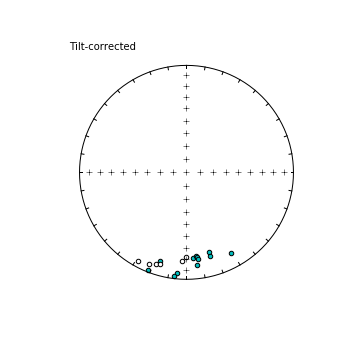


tightest grouping of vectors obtained at (95% confidence bounds):
-20 - 119 percent unfolding
range of all bootstrap samples: 
-20  -  119 percent unfolding


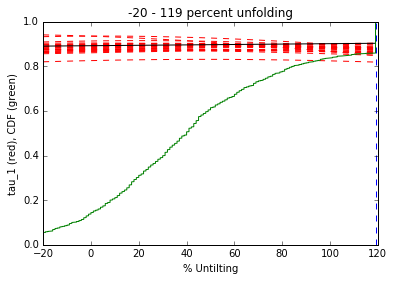

In [133]:
hem_boot_list =[]
for i in range(len(teel_sec_hem_geo_vgps)):
    dec_g,inc_g,dip_dir,dip=teel_sec_hem_geo_vgps['dec_geo'][i],teel_sec_hem_geo_vgps['inc_geo'][i],teel_site_bedding_hedit['sample_bed_dip_direction'][i],teel_site_bedding_hedit['sample_bed_dip'][i]
    hem_boot_list.append([dec_g,inc_g,dip_dir,dip])
hem_boot_data = np.array(hem_boot_list)
#save bootstrap file for command line fold test figure output
np.savetxt('./Code/notebook_output/hem_boot_data.txt',hem_boot_data,fmt='%.2f',delimiter=' ')
ipmag.bootstrap_fold_test(hem_boot_data,num_sims=1000,min_untilt=-20,max_untilt=120)

Below the geographic and tilt-corrected hematite VGPs are plotted on the globe and shaded according to their relative stratigraphic positions. Note the similar positions between the two coordinate system means.

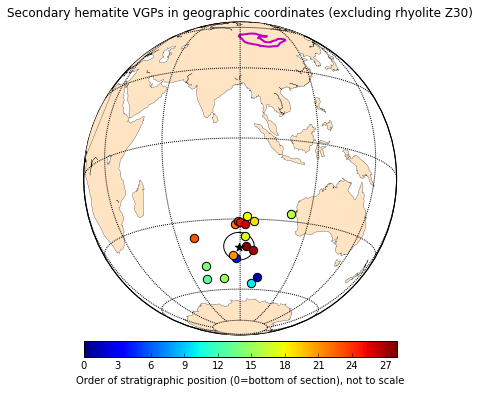

In [136]:
teel_sec_hem_vgps_geo_dir = ipmag.make_di_block(teel_hem_means_geo_edit['vgp_lon'],teel_hem_means_geo_edit['vgp_lat'])
teel_sec_hem_pole_geo = pmag.fisher_mean(teel_sec_hem_vgps_geo_dir)

m = Basemap(projection='ortho',lat_0=-15,lon_0=90,resolution='c',area_thresh=50000)
plt.figure(figsize=(6, 6))
m.drawcoastlines(linewidth=0.25)
m.fillcontinents(color='bisque',lake_color='white',zorder=1)
m.drawmapboundary(fill_color='white')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))
m.readshapefile('./Code/reconstructed_0','Mongolia',linewidth=2,color='m')

for n in xrange (0, len(teel_hem_means_geo_edit)):
     poles = ipmag.plot_pole_colorbar(m, teel_hem_means_geo_edit['vgp_lon'][n],teel_hem_means_geo_edit['vgp_lat'][n], 
                        1, 
                        teel_hem_means_geo_edit['strat_pos'][n], 
                        0,
                        28, 
                        markersize=70, color="k", alpha=1)

plt.title('Secondary hematite VGPs in geographic coordinates (excluding rhyolite Z30)')
m.colorbar(poles,location='bottom',label='Order of stratigraphic position (0=bottom of section), not to scale')
ipmag.plot_pole(m,teel_sec_hem_pole_geo['dec'],teel_sec_hem_pole_geo['inc'],teel_sec_hem_pole_geo['alpha95'],marker='*',markersize=70)
#plt.savefig('./notebook_output/')
plt.show()

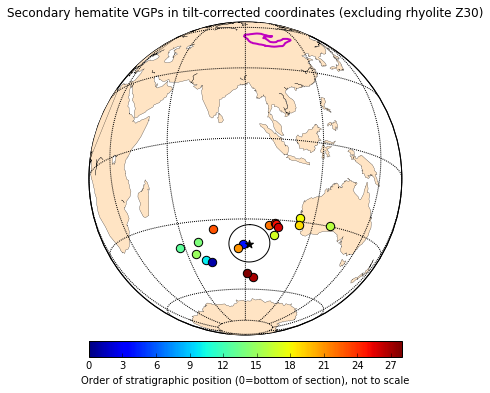

In [138]:
teel_sec_hem_vgps_dir = ipmag.make_di_block(teel_sec_hem_vgps['vgp_lon'],teel_sec_hem_vgps['vgp_lat'])
teel_sec_hem_pole = pmag.fisher_mean(teel_sec_hem_vgps_dir)

m = Basemap(projection='ortho',lat_0=-15,lon_0=90,resolution='c',area_thresh=50000)
plt.figure(figsize=(6, 6))
m.drawcoastlines(linewidth=0.25)
m.fillcontinents(color='bisque',lake_color='white',zorder=1)
m.drawmapboundary(fill_color='white')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))
m.readshapefile('./Code/reconstructed_0','Mongolia',linewidth=2,color='m')

for n in xrange (0, len(teel_sec_hem_vgps)):
     poles = ipmag.plot_pole_colorbar(m, teel_sec_hem_vgps['vgp_lon'][n],teel_sec_hem_vgps['vgp_lat'][n], 
                        1, 
                        teel_sec_hem_vgps['strat_pos'][n], 
                        0,
                        28, 
                        markersize=70, color="k", alpha=1)

plt.title('Secondary hematite VGPs in tilt-corrected coordinates (excluding rhyolite Z30)')
m.colorbar(poles,location='bottom',label='Order of stratigraphic position (0=bottom of section), not to scale')
ipmag.plot_pole(m,teel_sec_hem_pole['dec'],teel_sec_hem_pole['inc'],teel_sec_hem_pole['alpha95'],marker='*',markersize=70)
#plt.savefig('./notebook_output/...')
plt.show()

#### Present local field overprint - negative fold test

In [144]:
# Convert mean direction dictionaries to dataframes
Z30_low_geo = pd.DataFrame.from_dict({'Z30_low_geo':Z30_low_geo_mean}, orient='index')
Z31_low_geo = pd.DataFrame.from_dict({'Z31_low_geo':Z31_low_geo_mean}, orient='index')
Z32_low_geo = pd.DataFrame.from_dict({'Z32_low_geo':Z32_low_geo_mean}, orient='index')
Z33_low_geo = pd.DataFrame.from_dict({'Z33_low_geo':Z33_low_geo_mean}, orient='index')
Z34_low_geo = pd.DataFrame.from_dict({'Z34_low_geo':Z34_low_geo_mean}, orient='index')
Z35_low_geo = pd.DataFrame.from_dict({'Z35_low_geo':Z35_low_geo_mean}, orient='index')
Z36_low_geo = pd.DataFrame.from_dict({'Z36_low_geo':Z36_low_geo_mean}, orient='index')
Z37_low_geo = pd.DataFrame.from_dict({'Z37_low_geo':Z37_low_geo_mean}, orient='index')
Z38_low_geo = pd.DataFrame.from_dict({'Z38_low_geo':Z38_low_geo_mean}, orient='index')
Z39_low_geo = pd.DataFrame.from_dict({'Z39_low_geo':Z39_low_geo_mean}, orient='index')
Z40_low_geo = pd.DataFrame.from_dict({'Z40_low_geo':Z40_low_geo_mean}, orient='index')
Z41_low_geo = pd.DataFrame.from_dict({'Z41_low_geo':Z41_low_geo_mean}, orient='index')
Z42_low_geo = pd.DataFrame.from_dict({'Z42_low_geo':Z42_low_geo_mean}, orient='index')
Z43_low_geo = pd.DataFrame.from_dict({'Z43_low_geo':Z43_low_geo_mean}, orient='index')
Z44_low_geo = pd.DataFrame.from_dict({'Z44_low_geo':Z44_low_geo_mean}, orient='index')
Z45_low_geo = pd.DataFrame.from_dict({'Z45_low_geo':Z45_low_geo_mean}, orient='index')
Z46_low_geo = pd.DataFrame.from_dict({'Z46_low_geo':Z46_low_geo_mean}, orient='index')
Z47_low_geo = pd.DataFrame.from_dict({'Z47_low_geo':Z47_low_geo_mean}, orient='index')
Z48_low_geo = pd.DataFrame.from_dict({'Z48_low_geo':Z48_low_geo_mean}, orient='index')
Z49_low_geo = pd.DataFrame.from_dict({'Z49_low_geo':Z49_low_geo_mean}, orient='index')
#Z50_low_geo = pd.DataFrame.from_dict({'Z50_low_geo':Z50_low_geo_mean}, orient='index')
Z51_low_geo = pd.DataFrame.from_dict({'Z51_low_geo':Z51_low_geo_mean}, orient='index')
Z52_low_geo = pd.DataFrame.from_dict({'Z52_low_geo':Z52_low_geo_mean}, orient='index')
Z53_low_geo = pd.DataFrame.from_dict({'Z53_low_geo':Z53_low_geo_mean}, orient='index')
Z54_low_geo = pd.DataFrame.from_dict({'Z54_low_geo':Z54_low_geo_mean}, orient='index')
Z55_low_geo = pd.DataFrame.from_dict({'Z55_low_geo':Z55_low_geo_mean}, orient='index')
Z56_low_geo = pd.DataFrame.from_dict({'Z56_low_geo':Z56_low_geo_mean}, orient='index')
Z57_low_geo = pd.DataFrame.from_dict({'Z57_low_geo':Z57_low_geo_mean}, orient='index')
Z58_low_geo = pd.DataFrame.from_dict({'Z58_low_geo':Z58_low_geo_mean}, orient='index')
# combine all mean direction dataframes
teel_low_means_geo = Z30_low_geo
teel_low_means_geo = teel_low_means_geo.append(Z31_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z32_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z33_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z34_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z35_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z36_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z37_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z38_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z39_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z40_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z41_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z42_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z43_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z44_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z45_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z46_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z47_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z48_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z49_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z51_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z52_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z53_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z54_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z55_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z56_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z57_low_geo)
teel_low_means_geo = teel_low_means_geo.append(Z58_low_geo)
#rename dec/inc columns to show that they are tilt-corrected directions
teel_low_means_geo = teel_low_means_geo.rename(columns={'dec':'dec_tc'})
teel_low_means_geo = teel_low_means_geo.rename(columns={'inc':'inc_tc'})
#rearrange columns
teel_low_means_geo = teel_low_means_geo[['dec_tc','inc_tc','alpha95','n','k','r','csd']]
# not all sites have hematite comp - before adding site lat/long, delete rows
teel_locs_low_edit = teel_2015_site_locs
teel_locs_low_edit = teel_locs_low_edit[teel_locs_low_edit.er_site_name !='Z50']
#insert site_lat/site_lon
teel_low_means_geo.insert(0,'site_lat',list(teel_locs_low_edit['site_lat']))
teel_low_means_geo.insert(1,'site_lon',list(teel_locs_low_edit['site_lon']))
teel_low_means_geo.insert(0,'strat_pos',list(teel_locs_low_edit['strat_pos']))
#calculate pole coordinates for mean directions
ipmag.vgp_calc(teel_low_means_geo)
#rename columns
teel_low_means_geo = teel_low_means_geo.rename(columns={'dec_tc':'dec_geo'})
teel_low_means_geo = teel_low_means_geo.rename(columns={'inc_tc':'inc_geo'})
teel_low_means_geo.head()

,strat_pos,site_lat,site_lon,dec_geo,inc_geo,alpha95,n,k,r,csd,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
Z30_low_geo,4,47.10038,95.37550,346.473053,68.261419,11.458361,7,28.705783,6.790983,15.118208,51.429142,80.188638,36.526238,-80.188638,216.526238
Z31_low_geo,5,47.10049,95.37604,0.054372,64.923839,3.618073,8,235.361535,7.970259,5.279798,46.897847,89.793993,264.986185,-89.793993,84.986185
Z32_low_geo,6,47.10094,95.37684,25.452043,61.325382,8.812910,8,40.461392,7.826996,12.733993,42.434489,71.428192,190.579622,-71.428192,10.579622
Z33_low_geo,7,47.10107,95.37705,0.930272,64.380739,6.003504,8,86.089978,7.918690,8.729889,46.196993,88.893147,239.802233,-88.893147,59.802233
Z34_low_geo,8,47.10111,95.37712,0.648074,62.405014,3.865736,10,157.128808,9.942722,6.461854,43.729780,86.598151,267.460060,-86.598151,87.460060


In [143]:
# Convert mean direction dictionaries to dataframes
Z30_low = pd.DataFrame.from_dict({'Z30_low':Z30_low_tc_mean}, orient='index')
Z31_low = pd.DataFrame.from_dict({'Z31_low':Z31_low_tc_mean}, orient='index')
Z32_low = pd.DataFrame.from_dict({'Z32_low':Z32_low_tc_mean}, orient='index')
Z33_low = pd.DataFrame.from_dict({'Z33_low':Z33_low_tc_mean}, orient='index')
Z34_low = pd.DataFrame.from_dict({'Z34_low':Z34_low_tc_mean}, orient='index')
Z35_low = pd.DataFrame.from_dict({'Z35_low':Z35_low_tc_mean}, orient='index')
Z36_low = pd.DataFrame.from_dict({'Z36_low':Z36_low_tc_mean}, orient='index')
Z37_low = pd.DataFrame.from_dict({'Z37_low':Z37_low_tc_mean}, orient='index')
Z38_low = pd.DataFrame.from_dict({'Z38_low':Z38_low_tc_mean}, orient='index')
Z39_low = pd.DataFrame.from_dict({'Z39_low':Z39_low_tc_mean}, orient='index')
Z40_low = pd.DataFrame.from_dict({'Z40_low':Z40_low_tc_mean}, orient='index')
Z41_low = pd.DataFrame.from_dict({'Z41_low':Z41_low_tc_mean}, orient='index')
Z42_low = pd.DataFrame.from_dict({'Z42_low':Z42_low_tc_mean}, orient='index')
Z43_low = pd.DataFrame.from_dict({'Z43_low':Z43_low_tc_mean}, orient='index')
Z44_low = pd.DataFrame.from_dict({'Z44_low':Z44_low_tc_mean}, orient='index')
Z45_low = pd.DataFrame.from_dict({'Z45_low':Z45_low_tc_mean}, orient='index')
Z46_low = pd.DataFrame.from_dict({'Z46_low':Z46_low_tc_mean}, orient='index')
Z47_low = pd.DataFrame.from_dict({'Z47_low':Z47_low_tc_mean}, orient='index')
Z48_low = pd.DataFrame.from_dict({'Z48_low':Z48_low_tc_mean}, orient='index')
Z49_low = pd.DataFrame.from_dict({'Z49_low':Z49_low_tc_mean}, orient='index')
#Z50_low = pd.DataFrame.from_dict({'Z50_low':Z50_low_tc_mean}, orient='index')
Z51_low = pd.DataFrame.from_dict({'Z51_low':Z51_low_tc_mean}, orient='index')
Z52_low = pd.DataFrame.from_dict({'Z52_low':Z52_low_tc_mean}, orient='index')
Z53_low = pd.DataFrame.from_dict({'Z53_low':Z53_low_tc_mean}, orient='index')
Z54_low = pd.DataFrame.from_dict({'Z54_low':Z54_low_tc_mean}, orient='index')
Z55_low = pd.DataFrame.from_dict({'Z55_low':Z55_low_tc_mean}, orient='index')
Z56_low = pd.DataFrame.from_dict({'Z56_low':Z56_low_tc_mean}, orient='index')
Z57_low = pd.DataFrame.from_dict({'Z57_low':Z57_low_tc_mean}, orient='index')
Z58_low = pd.DataFrame.from_dict({'Z58_low':Z58_low_tc_mean}, orient='index')
# combine all mean direction dataframes
teel_low_means = Z30_low
teel_low_means = teel_low_means.append(Z31_low)
teel_low_means = teel_low_means.append(Z32_low)
teel_low_means = teel_low_means.append(Z33_low)
teel_low_means = teel_low_means.append(Z34_low)
teel_low_means = teel_low_means.append(Z35_low)
teel_low_means = teel_low_means.append(Z36_low)
teel_low_means = teel_low_means.append(Z37_low)
teel_low_means = teel_low_means.append(Z38_low)
teel_low_means = teel_low_means.append(Z39_low)
teel_low_means = teel_low_means.append(Z40_low)
teel_low_means = teel_low_means.append(Z41_low)
teel_low_means = teel_low_means.append(Z42_low)
teel_low_means = teel_low_means.append(Z43_low)
teel_low_means = teel_low_means.append(Z44_low)
teel_low_means = teel_low_means.append(Z45_low)
teel_low_means = teel_low_means.append(Z46_low)
teel_low_means = teel_low_means.append(Z47_low)
teel_low_means = teel_low_means.append(Z48_low)
teel_low_means = teel_low_means.append(Z49_low)
teel_low_means = teel_low_means.append(Z51_low)
teel_low_means = teel_low_means.append(Z52_low)
teel_low_means = teel_low_means.append(Z53_low)
teel_low_means = teel_low_means.append(Z54_low)
teel_low_means = teel_low_means.append(Z55_low)
teel_low_means = teel_low_means.append(Z56_low)
teel_low_means = teel_low_means.append(Z57_low)
teel_low_means = teel_low_means.append(Z58_low)
#rename dec/inc columns to show that they are tilt-corrected directions
teel_low_means = teel_low_means.rename(columns={'dec':'dec_tc'})
teel_low_means = teel_low_means.rename(columns={'inc':'inc_tc'})
#rearrange columns
teel_low_means = teel_low_means[['dec_tc','inc_tc','alpha95','n','k','r','csd']]
#insert site_lat/site_lon
teel_low_means.insert(0,'site_lat',list(teel_locs_low_edit['site_lat']))
teel_low_means.insert(1,'site_lon',list(teel_locs_low_edit['site_lon']))
teel_low_means.insert(0,'strat_pos',list(teel_locs_low_edit['strat_pos']))
#calculate pole coordinates for mean directions
ipmag.vgp_calc(teel_low_means)
teel_low_means.head()

,strat_pos,site_lat,site_lon,dec_tc,inc_tc,alpha95,n,k,r,csd,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
Z30_low,4,47.10038,95.37550,62.140855,33.713657,11.463681,7,28.680029,6.790795,15.124995,18.450285,32.248029,192.800152,-32.248029,12.800152
Z31_low,5,47.10049,95.37604,59.403835,27.876060,3.615270,8,235.725142,7.970304,5.275724,14.813793,31.483537,198.002746,-31.483537,18.002746
Z32_low,6,47.10094,95.37684,25.452043,61.325382,8.812910,8,40.461392,7.826996,12.733993,42.434489,71.428192,190.579622,-71.428192,10.579622
Z33_low,7,47.10107,95.37705,54.800714,28.344304,6.009620,8,85.916769,7.918526,8.738684,15.094685,34.722681,201.658195,-34.722681,21.658195
Z34_low,8,47.10111,95.37712,52.688703,27.653908,3.866823,10,157.041051,9.942690,6.463659,14.681124,35.788473,203.849471,-35.788473,23.849471


A number of poles are excluded because of inconsistencies between samples within site which resulted in large a95 values for these sites: Z45, Z51, and Z52.

In [146]:
teel_low_means_edit,teel_low_means_geo_edit=[],[]
teel_low_means_edit = teel_low_means#eliminate same sites from TC dec/incs
teel_low_means_edit = teel_low_means_edit.drop('Z45_low')
teel_low_means_edit = teel_low_means_edit.drop('Z51_low')
teel_low_means_edit = teel_low_means_edit.drop('Z52_low')
#also eliminated same sites from geo dec/incs
teel_low_means_geo_edit = teel_low_means_geo
teel_low_means_geo_edit = teel_low_means_geo_edit.drop('Z45_low_geo')
teel_low_means_geo_edit = teel_low_means_geo_edit.drop('Z51_low_geo')
teel_low_means_geo_edit = teel_low_means_geo_edit.drop('Z52_low_geo')
#for fold tests...also eliminate same sites from bedding orient. table
teel_site_bedding_ledit = teel_site_bedding 
teel_site_bedding_ledit = teel_site_bedding_ledit[teel_site_bedding_ledit.index !='Z50']
teel_site_bedding_ledit = teel_site_bedding_ledit[teel_site_bedding_ledit.index !='Z45']
teel_site_bedding_ledit = teel_site_bedding_ledit[teel_site_bedding_ledit.index !='Z51']
teel_site_bedding_ledit = teel_site_bedding_ledit[teel_site_bedding_ledit.index !='Z52']
#calculate means from edited list
teel_low_means_dib_geo = ipmag.make_di_block(list(teel_low_means_geo_edit['dec_geo']),list(teel_low_means_geo_edit['inc_geo']))
teel_low_di_mean_geo = pmag.fisher_mean(teel_low_means_dib_geo)
teel_low_means_dib = ipmag.make_di_block(list(teel_low_means_edit['dec_tc']),list(teel_low_means_edit['inc_tc']))
teel_low_di_mean = pmag.fisher_mean(teel_low_means_dib)

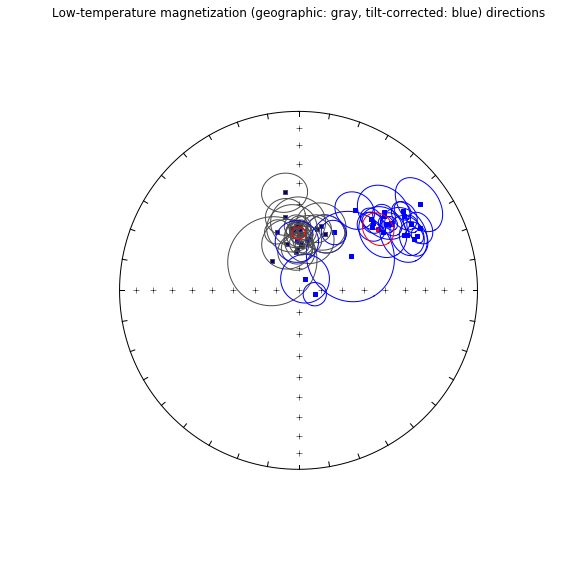

In [148]:
fignum = 1
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(1)
for n in range(len(teel_low_means_geo_edit)):
    ipmag.plot_di_mean(teel_low_means_edit['dec_tc'][n],
                      teel_low_means_edit['inc_tc'][n],
                      teel_low_means_edit['alpha95'][n],
                      color='b',marker='s',label='')
    ipmag.plot_di_mean(teel_low_means_geo_edit['dec_geo'][n],
                      teel_low_means_geo_edit['inc_geo'][n],
                      teel_low_means_geo_edit['alpha95'][n],
                      color='0.3',marker='s',label='')

ipmag.plot_di_mean(teel_low_di_mean['dec'],
                      teel_low_di_mean['inc'],
                      teel_low_di_mean['alpha95'],
                      color='r',marker='s')
ipmag.plot_di_mean(teel_low_di_mean_geo['dec'],
                      teel_low_di_mean_geo['inc'],
                      teel_low_di_mean_geo['alpha95'],
                      color='r',marker='*')
plt.title('Low-temperature magnetization (geographic: gray, tilt-corrected: blue) directions')
plt.savefig('./Code/notebook_output/lowT_plf_fold_test.pdf')
plt.show()

##### Bootstrap fold test (Tauxe and Watson, 1994)

doing  1000  iterations...please be patient.....


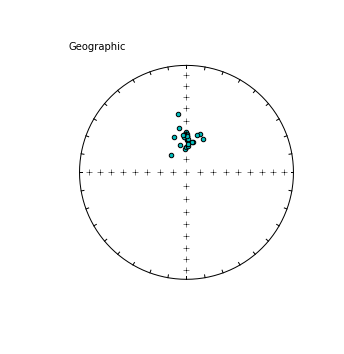

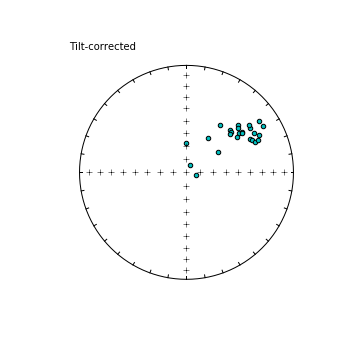


tightest grouping of vectors obtained at (95% confidence bounds):
-18 - 10 percent unfolding
range of all bootstrap samples: 
-20  -  23 percent unfolding


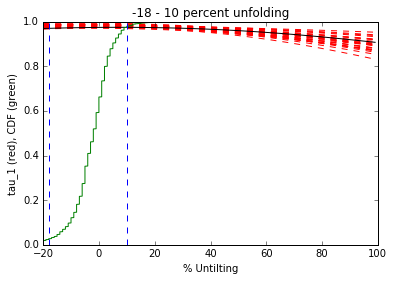

In [150]:
#also eliminate same sites from bedding orient. table
low_boot_list =[]
for i in range(len(teel_low_means_geo_edit)):
    dec_g,inc_g,dip_dir,dip=teel_low_means_geo_edit['dec_geo'][i],teel_low_means_geo_edit['inc_geo'][i],teel_site_bedding_ledit['sample_bed_dip_direction'][i],teel_site_bedding_ledit['sample_bed_dip'][i]
    low_boot_list.append([dec_g,inc_g,dip_dir,dip])
low_boot_data = np.array(low_boot_list)
#save bootstrap file for command line fold test figure output
np.savetxt('./Code/notebook_output/low_boot_data.txt',low_boot_data,fmt='%.2f',delimiter=' ')
ipmag.bootstrap_fold_test(low_boot_data,num_sims=1000,min_untilt=-20,max_untilt=100)

#### Teel poles summary

In [151]:
#calc paleolatitudes for different Teel poles and make pd.df to add later
teel_pole_paleolats = [np.degrees(np.arctan(0.5*np.tan(np.radians(teel_mag_di_mean['inc'])))),
                      np.degrees(np.arctan(0.5*np.tan(np.radians(teel_hem_di_mean['inc'])))),
                      np.degrees(np.arctan(0.5*np.tan(np.radians(teel_hem_di_mean_geo['inc']))))]
teel_paleolats_df = pd.DataFrame(data=teel_pole_paleolats,index=('Teel_magnetite_tc','Teel_hematite_tc','Teel_hematite_geo'))
#creat array of pole info (lists)
Teel_poles=[]
Teel_poles.append(teel_prim_mag_pole)
Teel_poles.append(teel_sec_hem_pole)
Teel_poles.append(teel_sec_hem_pole_geo)
#create pandas df from pole array
TeelPoles = pd.DataFrame(data=Teel_poles, index=('Teel_magnetite_tc','Teel_hematite_tc','Teel_hematite_geo'))
#rename/insert other columns for complete table
#Tidy up table
TeelPoles = TeelPoles.rename(columns = {'csd':'CSD'})
TeelPoles = TeelPoles.rename(columns = {'alpha95':'A_95'})
TeelPoles = TeelPoles.rename(columns = {'dec':'Pole_Long'})
TeelPoles = TeelPoles.rename(columns = {'inc':'Pole_Lat'})
TeelPoles = TeelPoles.rename(columns = {'k':'K'})
TeelPoles = TeelPoles.rename(columns = {'n':'N'})
TeelPoles.insert(7,'Paleolat',teel_paleolats_df)
#reorder columns
TeelPoles = TeelPoles[['Pole_Lat','Pole_Long','A_95','K','CSD','N','r','Paleolat']]
TeelPoles.to_csv('./Code/notebook_output/Teel_Poles')
TeelPoles

,Pole_Lat,Pole_Long,A_95,K,CSD,N,r,Paleolat
Teel_magnetite_tc,-36.495314,16.038788,5.236274,34.392364,13.811918,23,22.360323,-19.292649
Teel_hematite_tc,-39.717588,91.918678,7.536314,22.013320,17.264033,18,17.227740,3.063432
Teel_hematite_geo,-40.795648,89.426839,5.608638,38.960325,12.976983,18,17.563659,1.925148
